In [1]:
a = '''
IST 652 - Scripting for Data Analysis
Kelsey Kirby, Sean Deery, Mark Stiles
May 2, 2023
Final Project: Honda Data
'''

In [2]:
b = '''
DUE: Friday by 11:59pm EST at the end of Week 10

In addition to carrying out the project, you must write a final project report. In this report, you should

• Describe the data and its source(s), including any preprocessing

• Describe your methods of analysis, including the questions that will be answered, in what
fields the data will be used, and what the resulting output will be

• Include an overall description of the program, especially any special processes you did.

• The results you achieved – include these results or a summary of the results in your report with an analysis of those results.

• If your project is a group project, describe the tasks and roles of each member of the group

• Draw conclusions from your results about your data

What to Submit

1. The project report (Word document or PDF document)

2. The Python jupyter notebook, documented with comments

3. The output(s) of the program. (may be included in your report and/or jupyter notebook) 

QUESTIONS:

1. What car components are the key drivers of price point? 

2. What states have the highest or lowest cost?

3. How has MPG changed over the years per model?

4. Which models have the best ratings? 

5. What are the best deals for different budgets ($10,000, $20,000, ~ $60,000)?

6. Which models were sold for the most years? 
'''

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import string
import re

In [4]:
# Load data from csv file
#https://www.kaggle.com/datasets/omartorres25/honda-data
honda_data = pd.read_csv("honda_sell_data.csv")

In [5]:
# honda data columns
b = '''
Year
Make
Model
Condition
Price
Consumer_Rating
Consumer_Review_#
Exterior_Color
Interior_Color
Drivetrain
MPG
Fuel_Type
Transmission
Engine
VIN
Stock_#
Mileage
Comfort_Rating
Interior_Design_Rating
Performance_Rating
Value_For_Money_Rating
Exterior_Styling_Rating
Reliability_Rating
State
Seller_Type
'''

In [6]:
def color_categories(string_values):
    s = string_values.lower()
    # need to account for tolower
    # [x.lower() for x in ["A", "B", "C"]]
    # crystal or black
    if("crystal" in s or "black" in s):
        return "Black"
    # mar or scarlet or burgundy or lava or crimson or cherry or red
    elif("mar" in s or "scarlet" in s or "burgundy" in s or "lava" in s or "crimson" in s or "cherry" in s or "red" in s):
        return "Red"
    # 'mist' or 'mist metallic' or morning or still or canyon or mountain or nordic or celestite or ocean or sky or sapphire or blue
    elif(s == "mist" or s == "mist metallic" or "morning" in s or "still" in s or "canyon" in s or "mountain" in s or "nordic" in s or "celestite" in s or "ocean" in s or "sky" in s or "sapphire" in s or "blue" in s):
        return "Blue"
    # 'pearl' or white or 883
    elif(s == "pearl" or "white" in s or "883" in s):
        return "White"
    # 'steel' or 'steel metallic' or 'platinum' or 'silver' or 'silver metallic' or silverstone or satin or solor or whistler or storm or alabaster or gunmetal or charcoal or titanium or lunar or meteorite or hematite or 904 or 877 or graphite or polished or pewter or gray
    elif(s == "steel" or s == "steel metallic" or s == "platinum" or s == "silver" or s == "silver metallic" or "silverstone" in s or "satin" in s or "solar" in s or "whistler" in s or "storm" in s or "alabaster" in s or "gunmetal" in s or "charcoal" in s or "titanium" in s or "lunar" in s or "meteorite" in s or "hematite" in s or "904" in s or "877" in s or "graphite" in s or "polished" in s or "pewter" in s or "gray" in s):
        return "Gray"
    # 'forest mist' or moonlit or pacific* or moss or green
    elif(s == "forest mist" or s == "pacific" or "moonlit" in s or "moss" in s or "green" in s):
        return "Green"
    # amethyst or violet or mauve or purple
    elif("amethyst" in s or "violet" in s or "mauve" in s or "purple" in s):
        return "Purple"
    # desert or gold
    elif("desert" in s or "gold" in s):
        return "Gold"
    # blazing or tangerine or orange
    elif("blazing" in s or "tangerine" in s or "orange" in s):
        return "Orange"
    # kona or brown or topaz
    elif("kona" in s or "brown" in s or "topaz" in s):
        return "Brown"
    # beige or tan or frost
    elif("beige" in s or "tan" in s or "frost" in s):
        return "Tan"
    # yellow
    elif("yellow" in s):
        return "Yellow"

In [7]:
def create_categories(s):
    if(s.startswith("Accord")):
        return "Accord"
    elif(s.startswith("CR-V")):
            return "CR-V"
    elif(s.startswith("CR-Z")):
            return "CR-Z"
    elif(s.startswith("Civic")):
            return "Civic"
    elif(s.startswith("Clarity")):
            return "Clarity"
    elif(s.startswith("Crosstour")):
            return "Crosstour"
    elif(s.startswith("Element")):
            return "Element"
    elif(s.startswith("Fit")):
            return "Fit"
    elif(s.startswith("HR-V")):
            return "HR-V"
    elif(s.startswith("Insight")):
            return "Insight"
    elif(s.startswith("Odyssey")):
            return "Odyssey"
    elif(s.startswith("Passport")):
            return "Passport"
    elif(s.startswith("Pilot")):
            return "Pilot"
    elif(s.startswith("Prelude")):
            return "Prelude"
    elif(s.startswith("Ridgeline")):
            return "Ridgeline"
    elif(s.startswith("S2000")):
            return "S2000"
    elif(s.startswith("del Sol")):
        return "del Sol"

In [8]:
def average_mpg(s):
    if s is np.nan:
        return None
    str_parts = s.split("–")
    if(len(str_parts) < 2):
        return None
    avg_mpg = float(str_parts[0]) + float(str_parts[1]) / 2
    return int(avg_mpg)

In [9]:
def transmission_category(string_values):
    s = string_values.lower()
    if(s.startswith("10 speed a") or s.startswith("10-speed a")):
        return "10 Speed Automatic"
    elif(s.startswith("4-speed a")):
        return "04 Speed Automatic"
    elif(s.startswith("5 speed a") or s.startswith("5-speed a")):
        return "05 Speed Automatic"
    elif(s.startswith("5-speed m")):
        return "05 Speed Manual"
    elif(s.startswith("6 speed a") or s.startswith("6-speed a")):
        return "06 Speed Automatic"
    elif(s.startswith("6-speed m")):
        return "06 Speed Manual"
    elif(s.startswith("9 speed a") or s.startswith("9-speed a")):
        return "09 Speed Automatic"
    elif(s.startswith("1-speed") or s.startswith("automatic cvt") or s.startswith("cvt") or s.startswith("continuously") or s.startswith("ecvt") or s.startswith("electronic continuously")):
        return "11 Continuously Variable"
    else:
        return "Unknown"

In [10]:
def find_size(s):
    if(pd.isna(s)):
        return None
    result = re.search("([0-9][.][0-9][ ]?L|[2][.][2])", s)
    if(result == None):
        return None
    else: 
        return result.group().replace(" ", "").replace("L", "")

In [11]:
def find_cylinder_count(s):
    if(pd.isna(s)):
        return None
    result = re.search("(\d Cyl|I\d|I-\d|V-\d|V\d)", s)
    if(result == None):
        return None
    else: 
        return result.group().replace(" ", "").replace("Cyl", "").replace("I", "").replace("V", "").replace("-", "")

In [12]:
def find_cylinder_valves(s):
    if(pd.isna(s)):
        return None
    result = re.search("(\d{1,2}V)", s)
    if(result == None):
        return None
    else: 
        return result.group().replace("V", "")

In [13]:
# SOHC - single overhead cam - better for low power car
# DOHC - dual overhead cam - better for high power car

def find_cam_count(s):
    if(pd.isna(s)):
        return None
    result = re.search("(SOHC|DOHC)", s)
    if(result == None):
        return None
    elif(result.group() == "SOHC"):
        return 1
    elif(result.group() == "DOHC"):
        return 2

In [14]:
# GDI - gas direct injection - not free to add power independently, as opposed to manifold injection
# MPFI - multi port fuel injection - improves fuel efficiency

def find_injection_type(s):
    if(pd.isna(s)):
        return None
    result = re.search("(GDI|MPFI)", s)
    if(result == None):
        return None
    else:
        return result.group()

In [15]:
def is_hybrid(s):
    if(pd.isna(s)):
        return 0
    result = re.search("(Hybrid|hybrid)", s)
    if(result == None):
        return 0
    else:
        return 1

In [16]:
def is_turbo(s):
    if(pd.isna(s)):
        return 0
    result = re.search("(Turbo|turbo)", s)
    if(result == None):
        return 0
    else:
        return 1

In [17]:
# set years as int
honda_data.Year = honda_data.Year.astype("Int32")

# fixing a few misaligned columns
c1 = honda_data.Fuel_Type == "5-Speed A/T"
c2 = honda_data.Fuel_Type == "A/T"
c3 = honda_data.Fuel_Type == "6-Speed M/T"
c4 = honda_data.Fuel_Type == "CVT Transmission"
c5 = honda_data.Fuel_Type == "6-Speed M/T"

honda_data.loc[c1 | c2 | c3 | c4 | c5, "Mileage"] = honda_data.loc[c1 | c2 | c3 | c4 | c5, "VIN"].str.replace(" mi.", "", regex=False)
honda_data.loc[c1 | c2 | c3 | c4 | c5, "VIN"] = honda_data.loc[c1 | c2 | c3 | c4 | c5, "Engine"]
honda_data.loc[c1 | c2 | c3 | c4 | c5, "Engine"] = honda_data.loc[c1 | c2 | c3 | c4 | c5, "Transmission"].str.replace("Gasoline Fuel","", regex=False)
honda_data.loc[c1 | c2 | c3 | c4 | c5, "Transmission"] = honda_data.loc[c1 | c2 | c3 | c4 | c5, "Fuel_Type"]
honda_data.loc[c1 | c2 | c3 | c4 | c5, "Fuel_Type"] = "Gasoline"
honda_data.loc[c1 | c2 | c3 | c4 | c5, "Stock_#"] = np.nan

# convert all words to null in mileage and convert to int
honda_data.Mileage = honda_data.Mileage.str.translate(str.maketrans('', '', string.punctuation))
honda_data.Mileage = honda_data.Mileage.str.replace("[^0-9.]+", "", regex=True)
honda_data.loc[honda_data.Mileage == "", ['Mileage']] = None
honda_data.Mileage = honda_data.Mileage.astype("Int32")

# remove the text and symbols from price and convert to int
honda_data.Price = honda_data.Price.str.replace("Not Priced", "")
honda_data.loc[honda_data.Price == "", ['Price']] = None
honda_data.Price = honda_data.Price.str.replace("[^0-9.]+", "", regex=True)
honda_data.Price = honda_data.Price.astype("Int32")

# fix states
honda_data.loc[honda_data.State == "MO-22","State"] = "MO"
honda_data.loc[honda_data.State == "Glens","State"] = np.nan
honda_data.loc[honda_data.State == "Route","State"] = np.nan

# align all the drive train options
honda_data.loc[(honda_data.Drivetrain == "AWD"),"Drivetrain"] = "All-wheel Drive"
honda_data.loc[honda_data.Drivetrain == "FWD","Drivetrain"] = "Front-wheel Drive"
honda_data.loc[honda_data.Drivetrain == "–","Drivetrain"] = np.nan

# clean up transmissions
honda_data.Transmission = honda_data.Transmission.str.replace("–", "", regex=False)

In [18]:
# remove any rows that contain missing values
honda_data.dropna(inplace=True)

In [19]:
# discretize model into category column
honda_data["Model_Category"] = honda_data.Model.apply(create_categories)

# create average mpg column
honda_data["Average_MPG"] = honda_data.MPG.apply(average_mpg).astype("Int32")

# discretize exterior color into color category
honda_data.Exterior_Color = honda_data.Exterior_Color.astype("str")
honda_data["Exterior_Color_Category"] = honda_data.Exterior_Color.apply(color_categories)

# discretize transmission
honda_data["Transmission_Category"] = honda_data.Transmission.apply(transmission_category)

# extract cylinder liter size
honda_data["Cylinder_Size"] = honda_data.Engine.apply(find_size).astype("float32")

# extract cylinder count
honda_data["Cylinder_Count"] = honda_data.Engine.apply(find_cylinder_count).astype("Int32")

# extract cylinder valves
honda_data["Cylinder_Valves"] = honda_data.Engine.apply(find_cylinder_valves).astype("Int32")

# extract cam count
honda_data["Cams"] = honda_data.Engine.apply(find_cam_count).astype("float32")

# extract cam count
honda_data["Injection_Type"] = honda_data.Engine.apply(find_injection_type)

# is hybrid
honda_data["Hybrid"] = honda_data.Engine.apply(is_hybrid)

# is turbo
honda_data["Turbo"] = honda_data.Engine.apply(is_turbo)

In [20]:
# increase size of plots because of large ranges for x-values
plt.rcParams['figure.figsize'] = [14.0, 6.0] 
plt.rcParams['figure.dpi'] = 90

In [21]:
#####################################################################
#
# Initial Exploratory Data Analysis 
#
#####################################################################

In [22]:
figure_num = 1

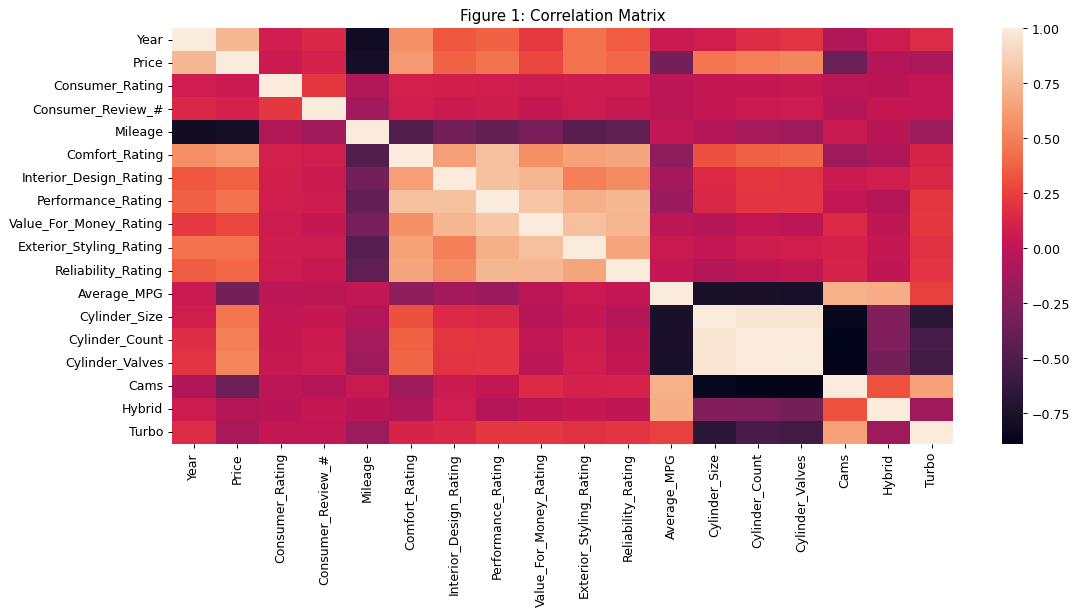

In [23]:
sns.heatmap(honda_data.corr(numeric_only=True));
plt.title(f"Figure {figure_num}: Correlation Matrix")
figure_num += 1
plt.show()

In [24]:
#####################################################################
#
# Question 1. What car components are the key drivers of price point? 
#
#####################################################################

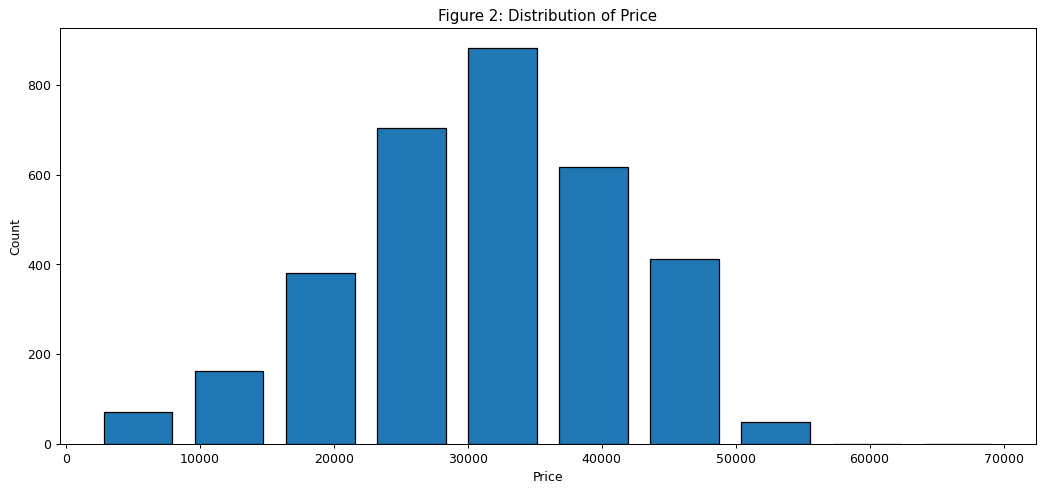

In [25]:
price_data = honda_data[honda_data.Price != None]
plt.hist(price_data.Price, edgecolor='black', rwidth=0.75)
plt.title(f"Figure {figure_num}: Distribution of Price")
figure_num += 1
plt.xlabel("Price")
plt.ylabel("Count")
plt.show() 

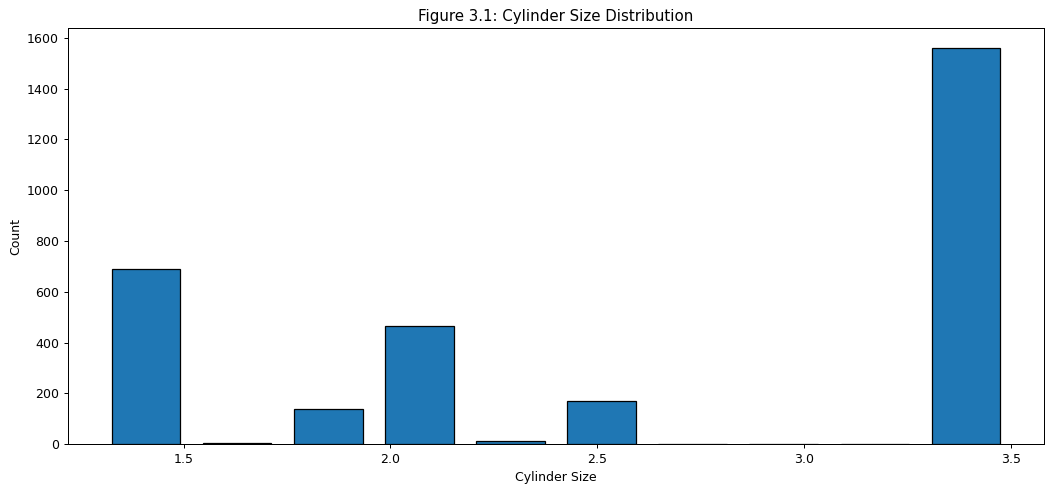

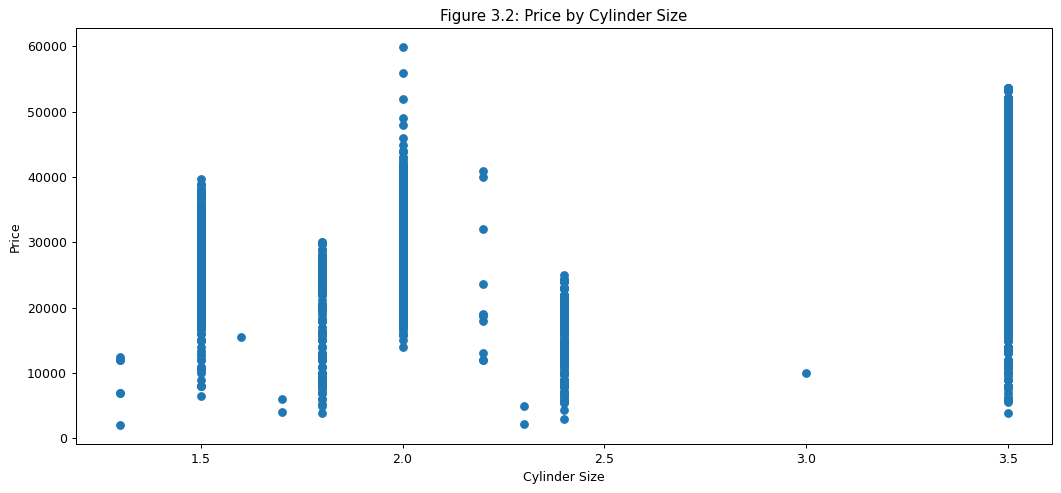

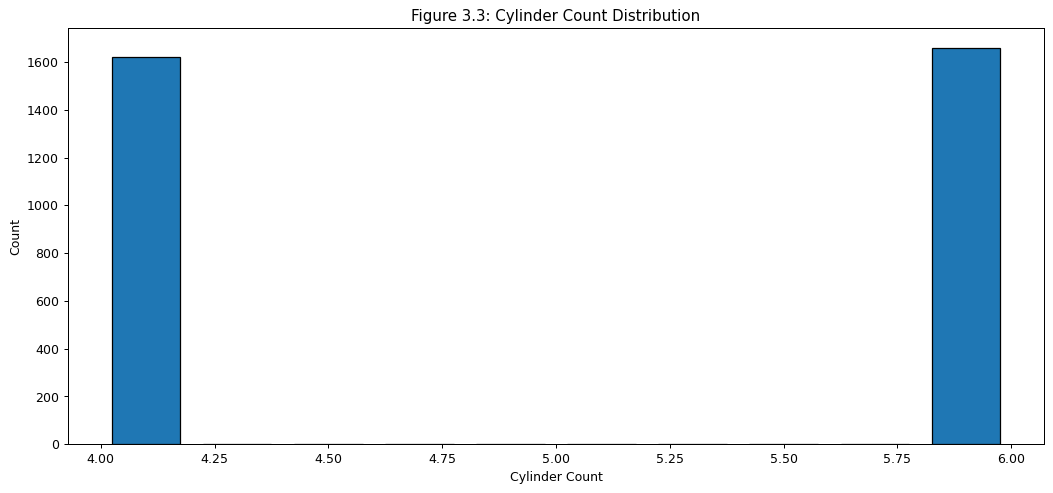

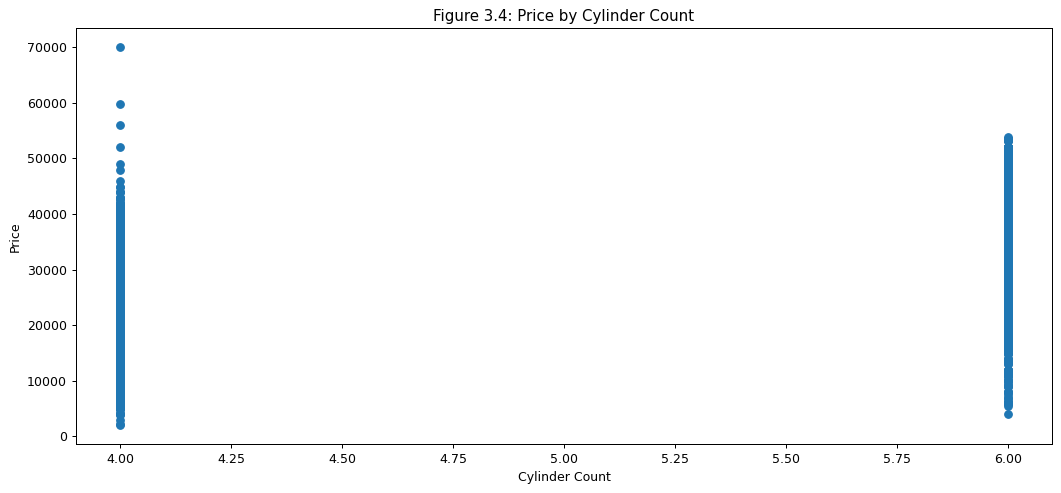

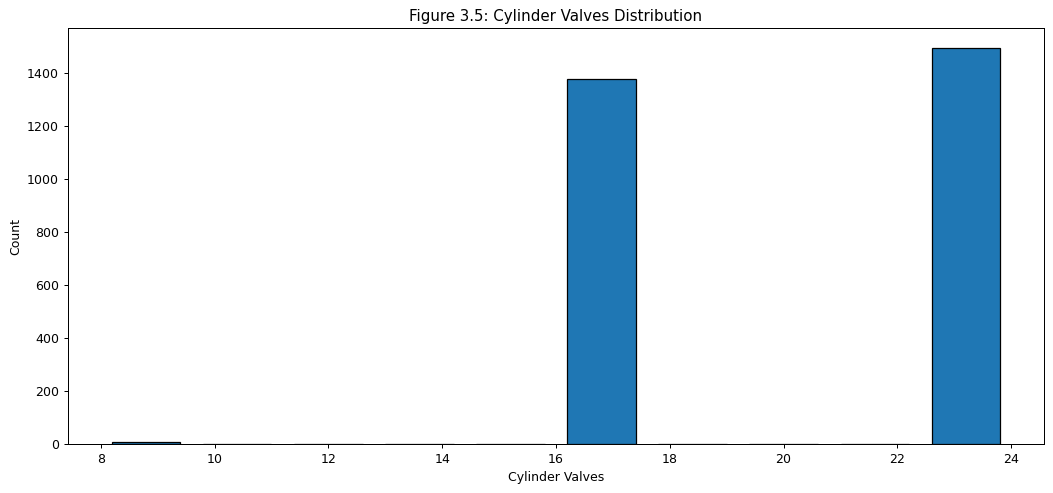

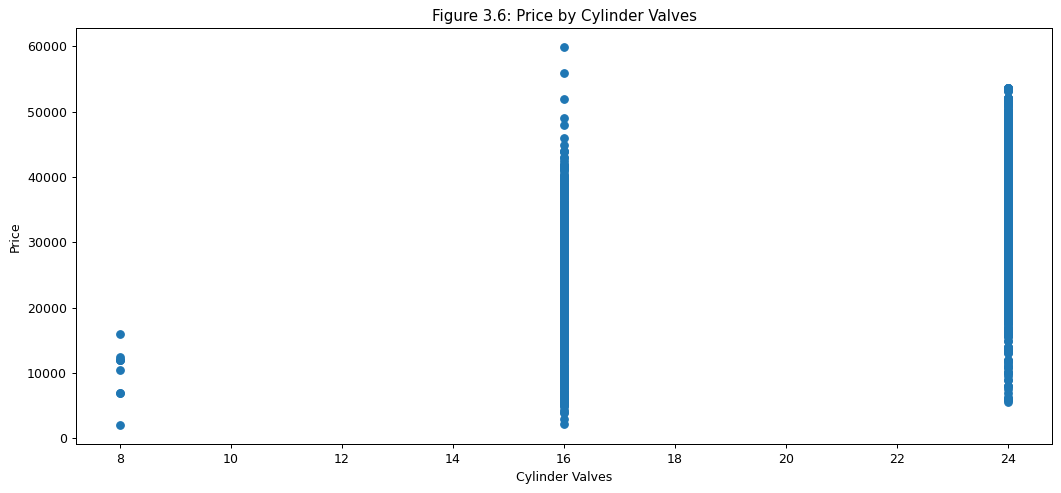

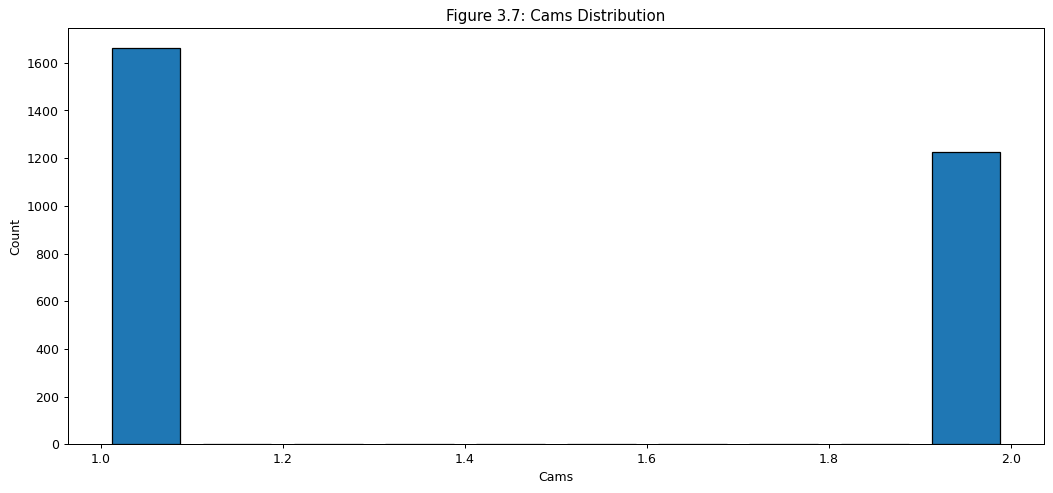

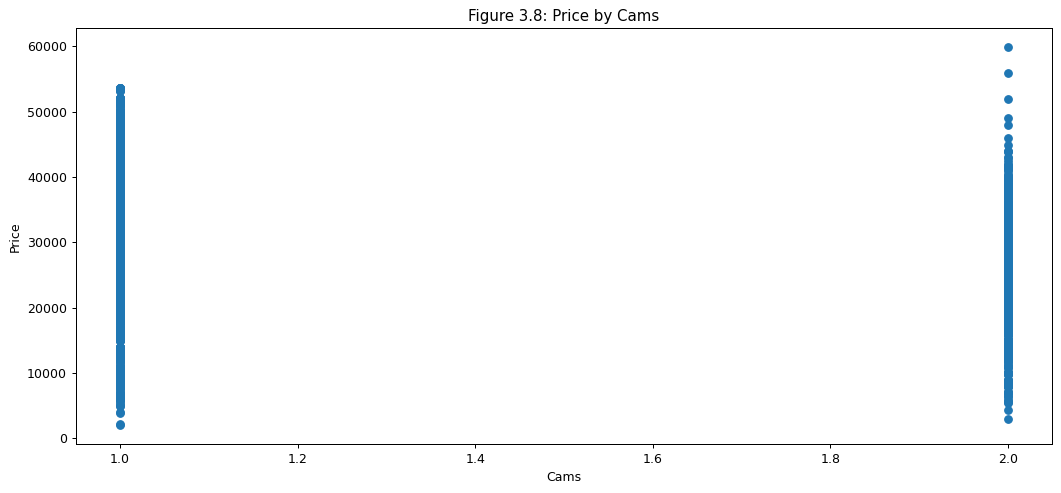

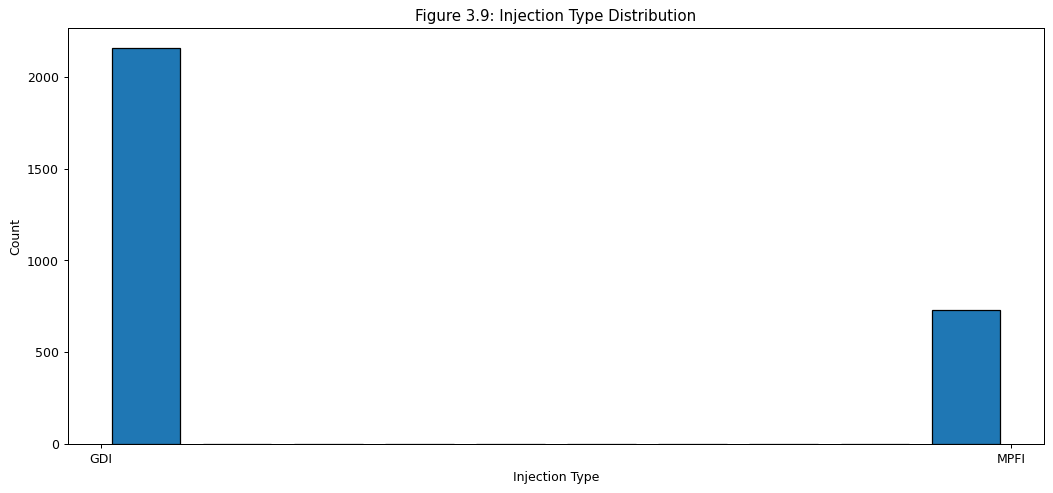

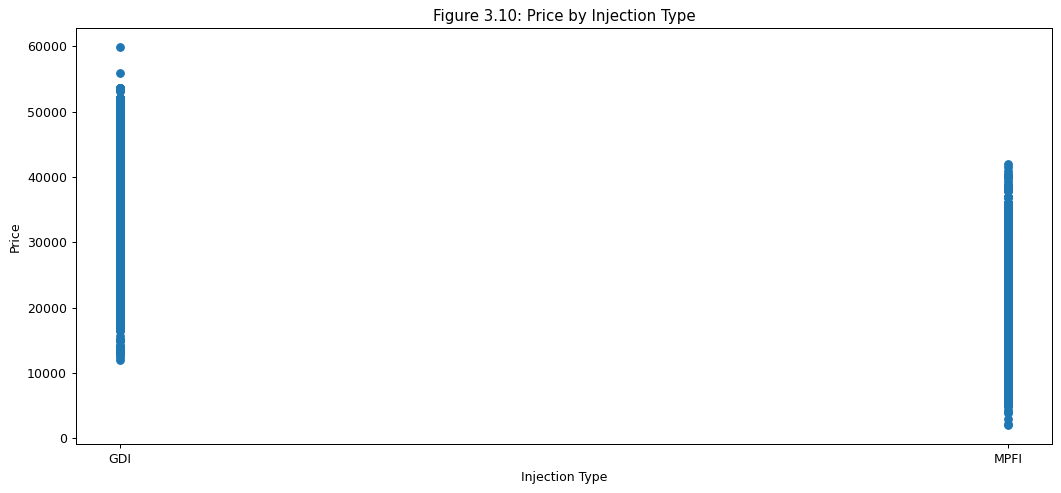

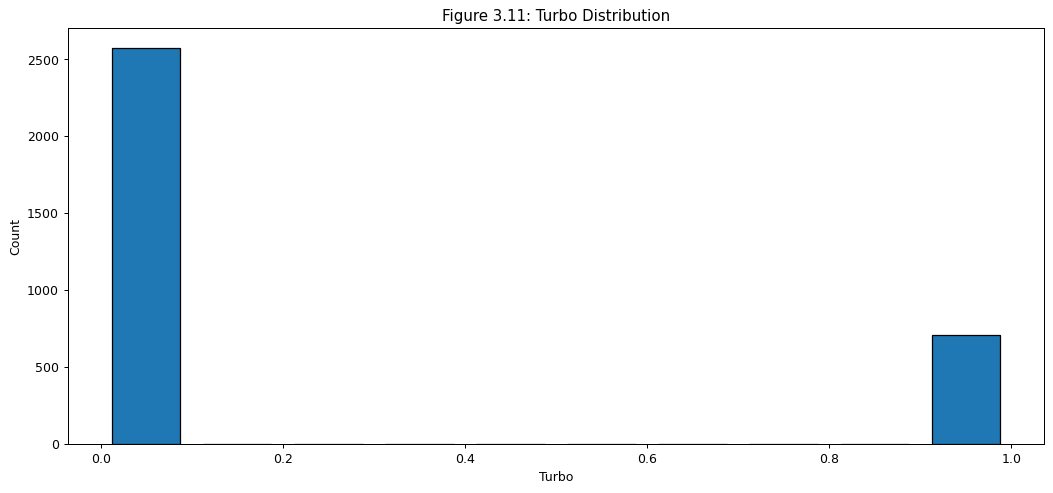

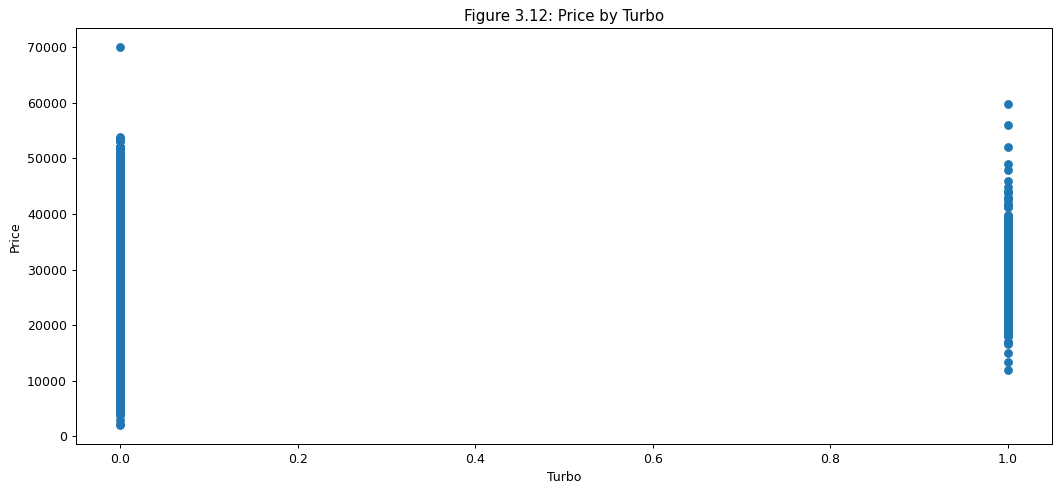

In [26]:
engine_props = ["Cylinder_Size", "Cylinder_Count", "Cylinder_Valves", "Cams", "Injection_Type", "Turbo"]
figure_sub_num = 1
for prop in engine_props:
    name_fix = prop.replace("_", " ")
    eng_data = honda_data[~pd.isna(honda_data[prop])]
    plt.hist(eng_data[prop], edgecolor='black', rwidth=0.75)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: {name_fix} Distribution")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("Count")
    plt.show()

    plot_data = honda_data[(~pd.isna(honda_data.Price)) & (~pd.isna(honda_data[prop]))]
    plt.scatter(plot_data[prop], plot_data.Price)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: Price by {name_fix}")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("Price")
    plt.show()
figure_num += 1

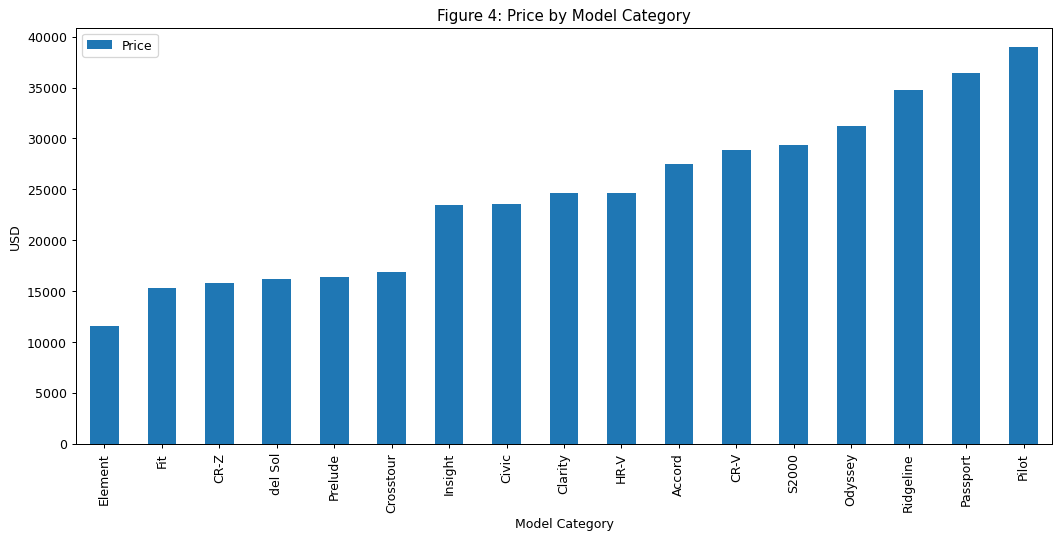

In [27]:
model_data = honda_data.groupby(["Model_Category"]).aggregate({
    'Price': 'mean',
})
model_data.sort_values('Price').plot(kind='bar')
plt.title(f"Figure {figure_num}: Price by Model Category")
figure_num += 1
plt.xlabel("Model Category")
plt.ylabel("USD")
plt.show()

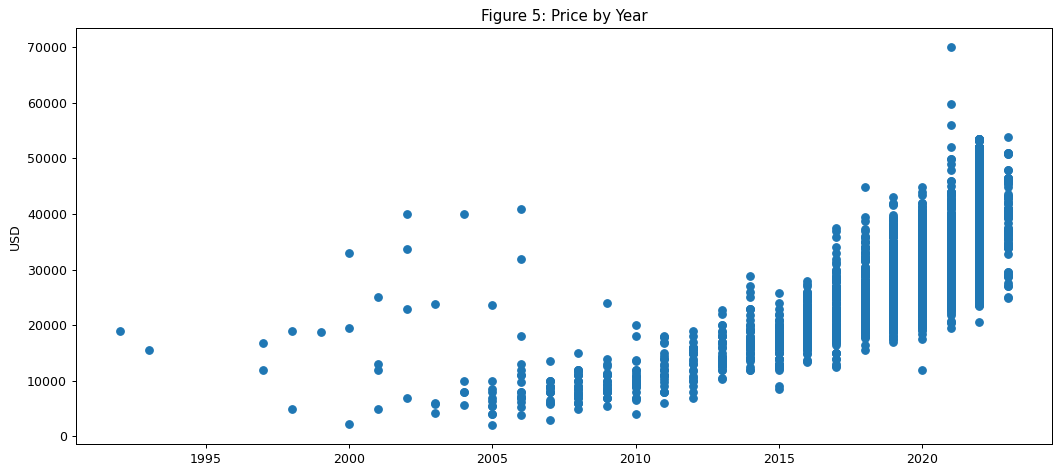

In [28]:
plot_data = honda_data[(~pd.isna(honda_data.Price)) & (~pd.isna(honda_data.Year))]
plt.scatter(plot_data.Year, plot_data.Price)
plt.title(f"Figure {figure_num}: Price by Year")
figure_num += 1
plt.ylabel("USD")
plt.show()

In [29]:
plot_data[plot_data.Year < 1995][["Year","Model","Price"]]

Year           Model  Price
2338  1992  Prelude Si 4WS  18900
4677  1993      del Sol Si  15500

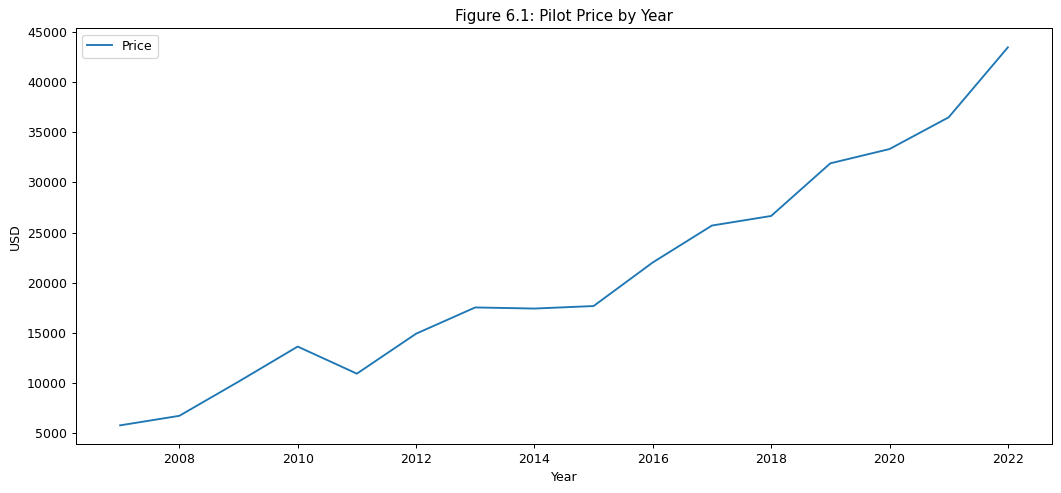

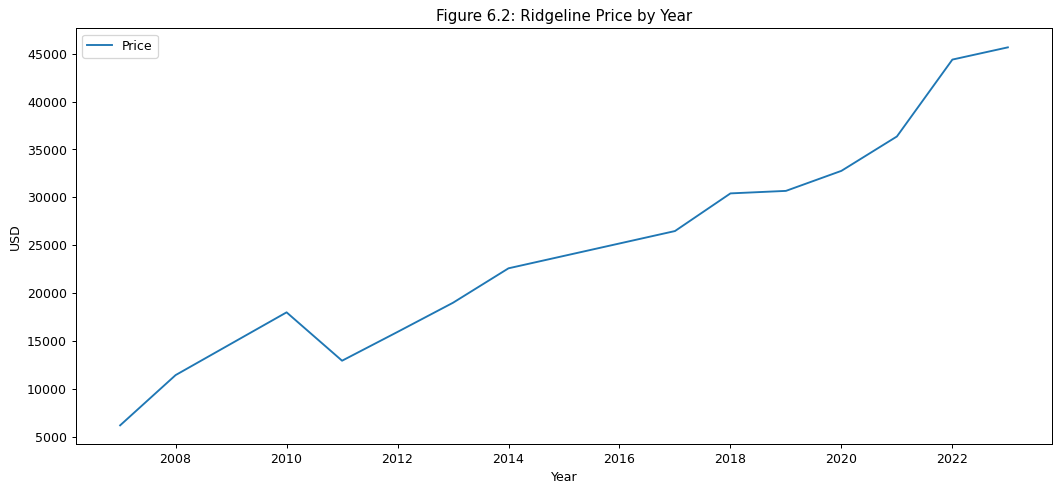

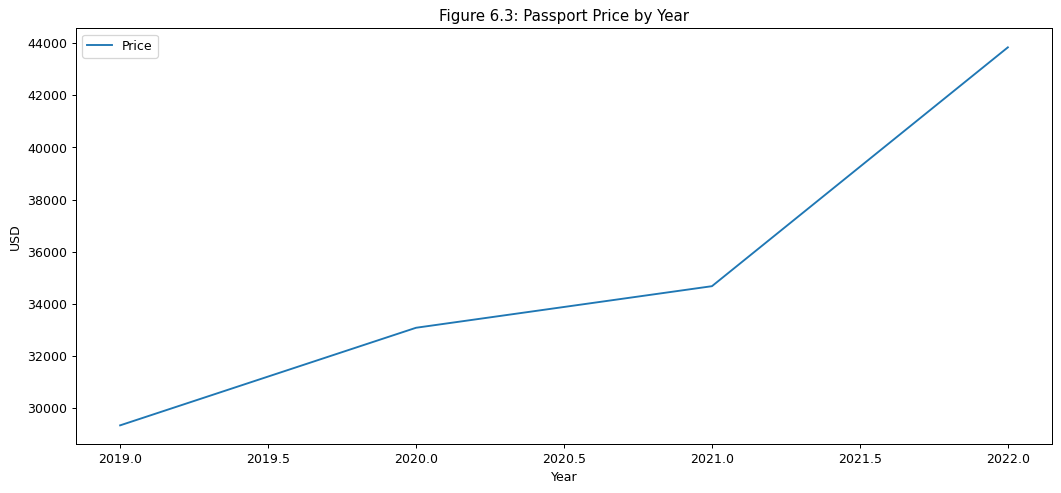

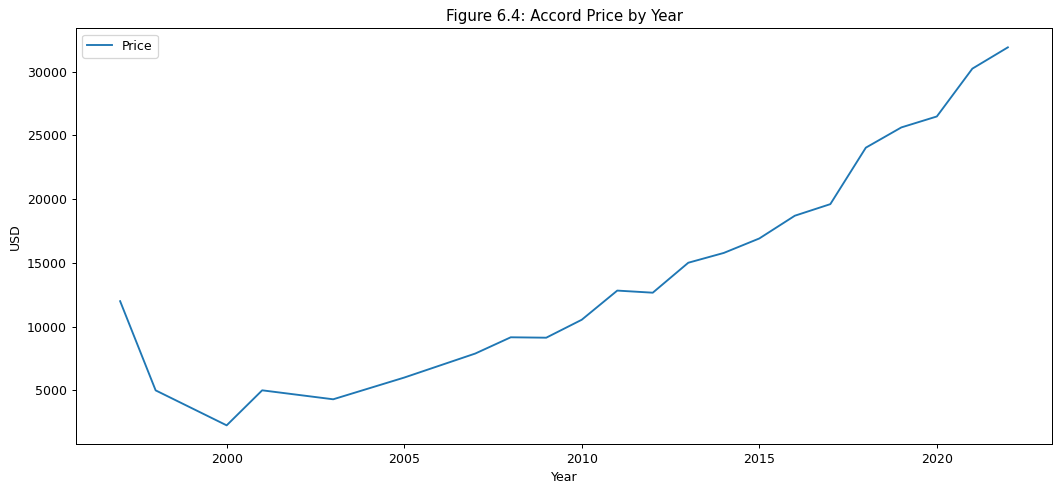

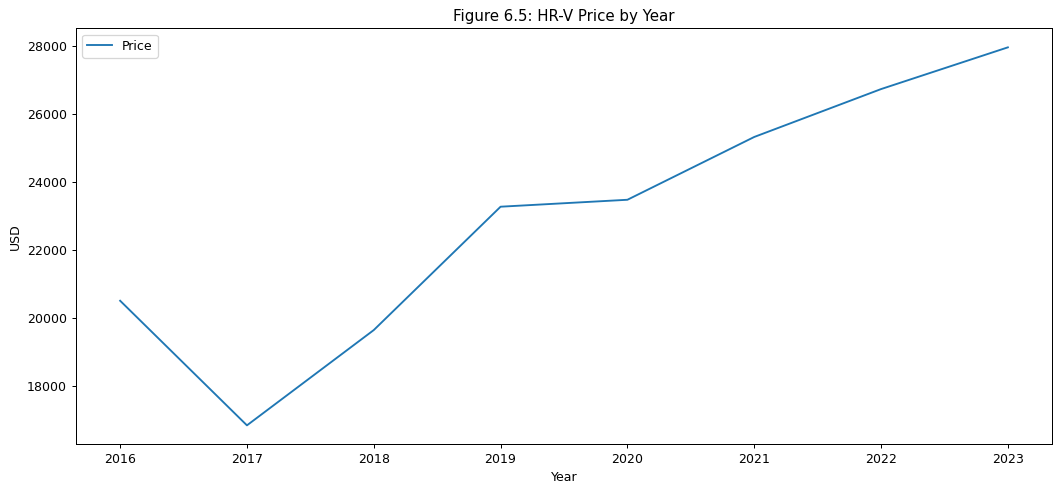

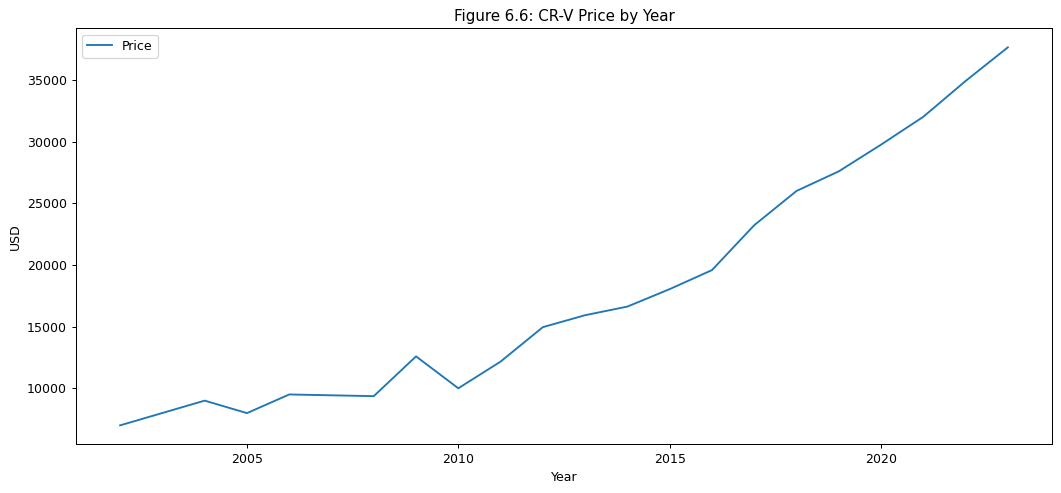

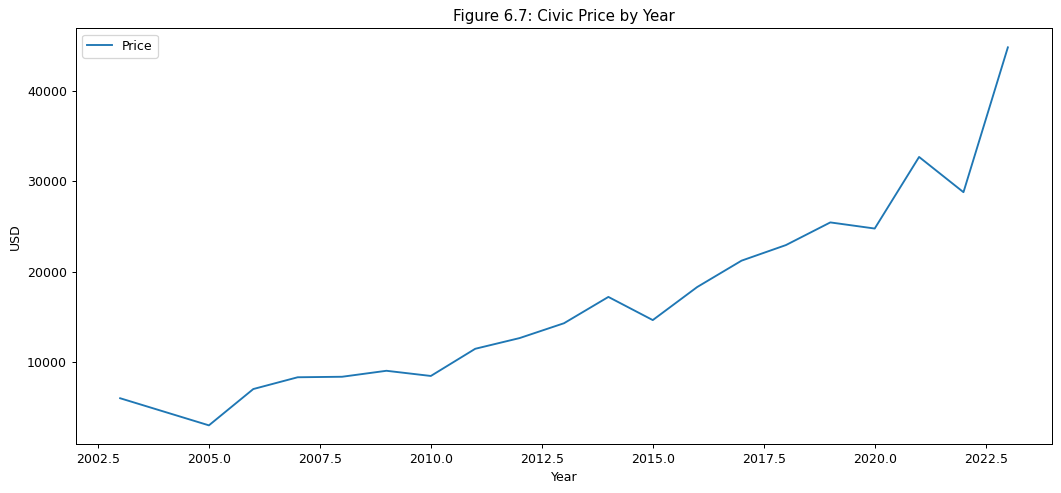

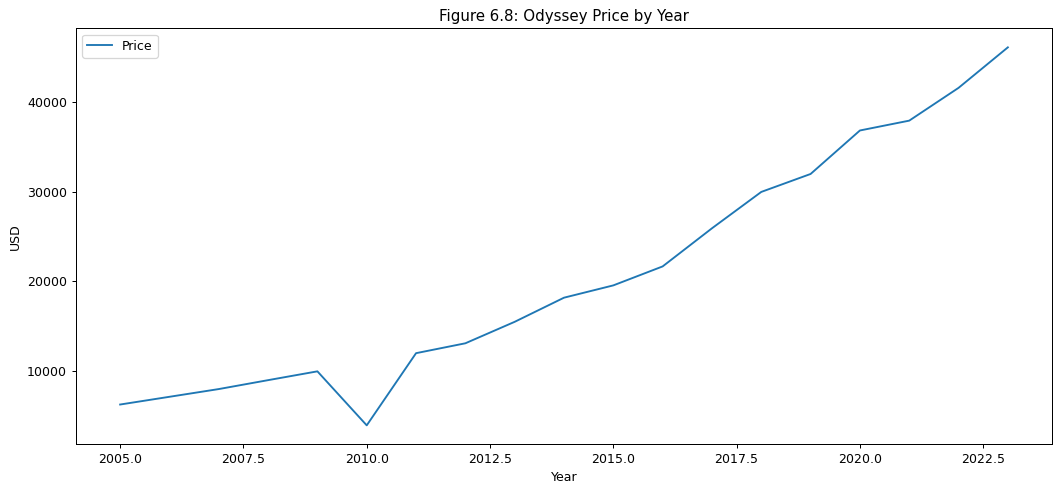

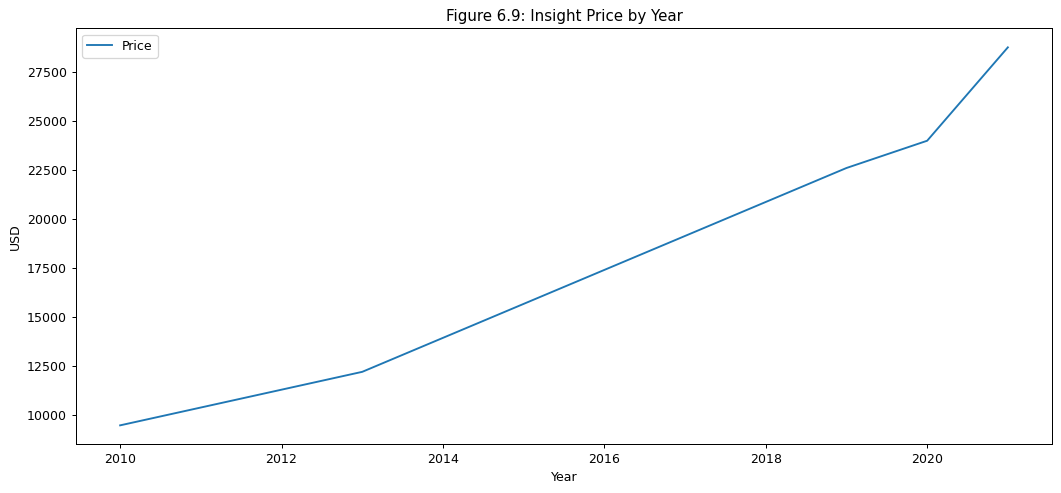

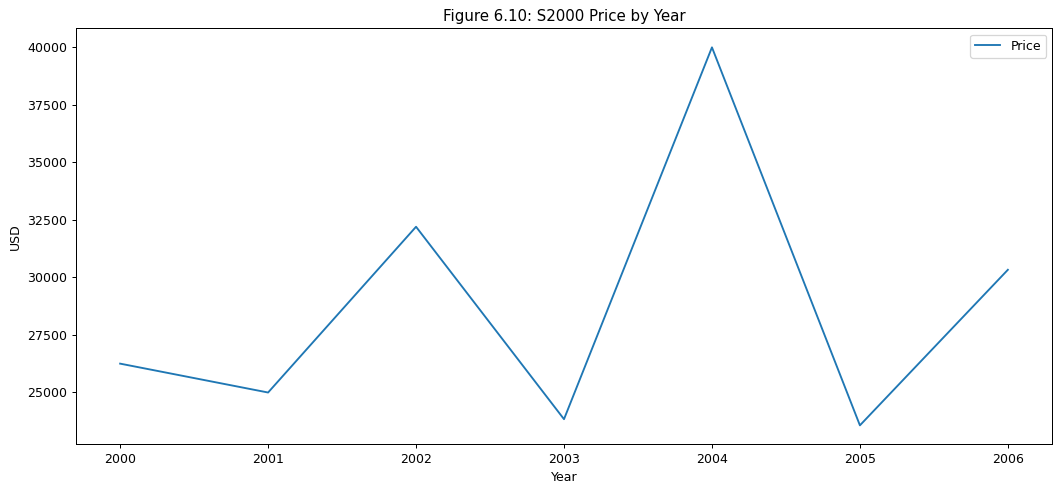

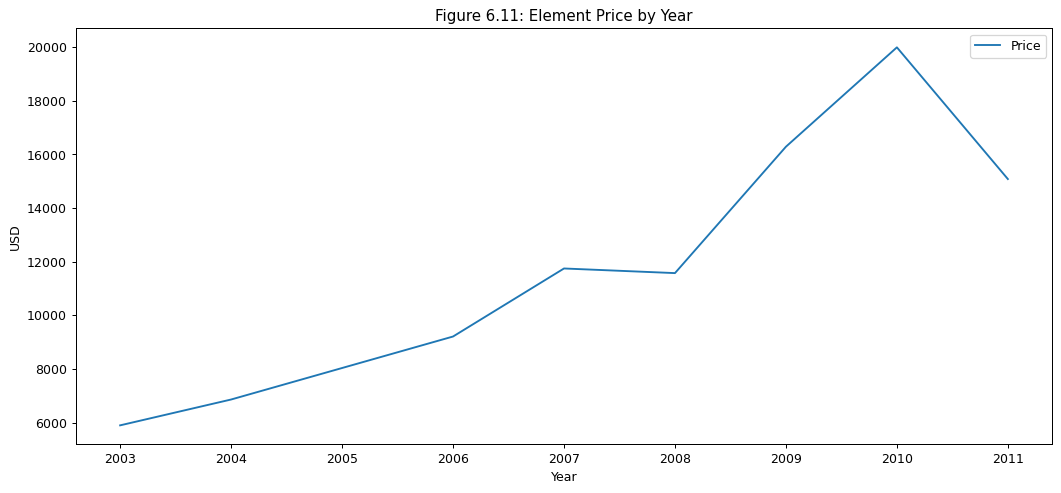

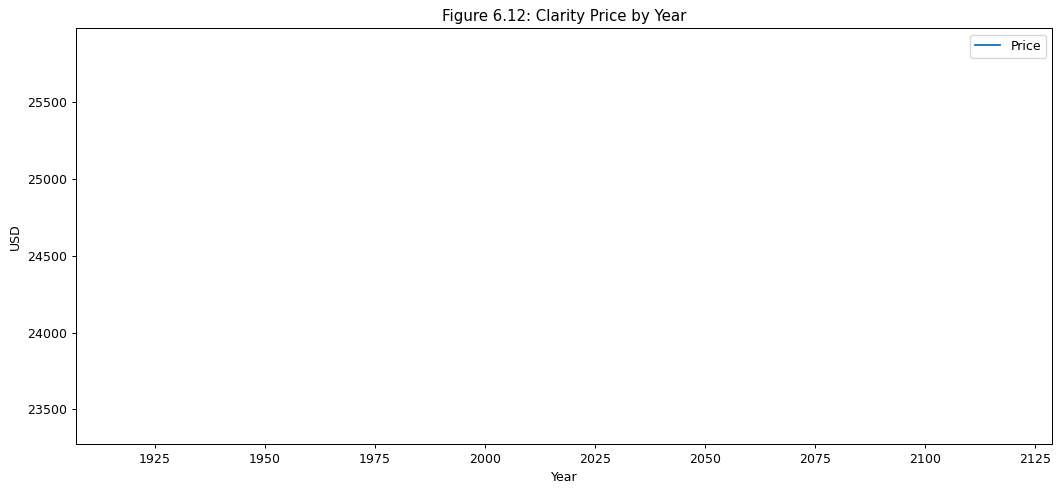

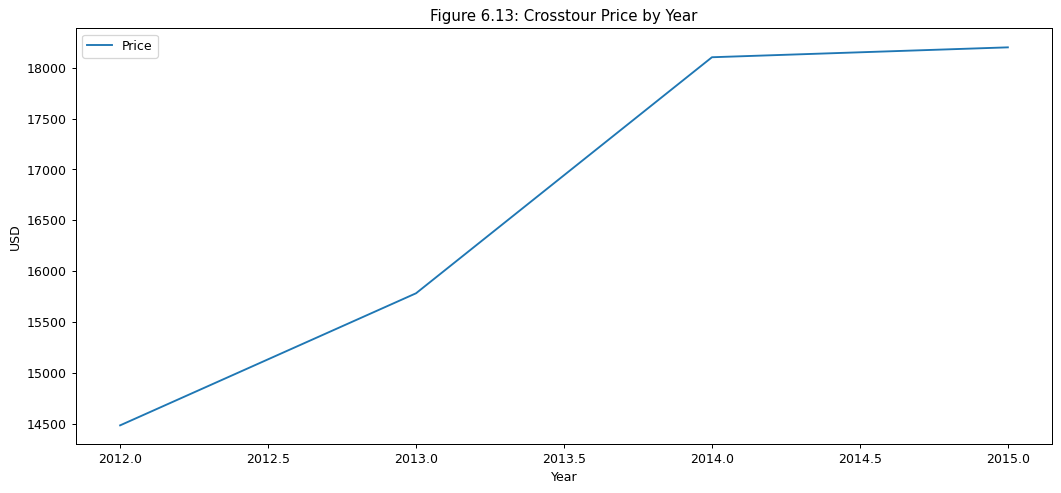

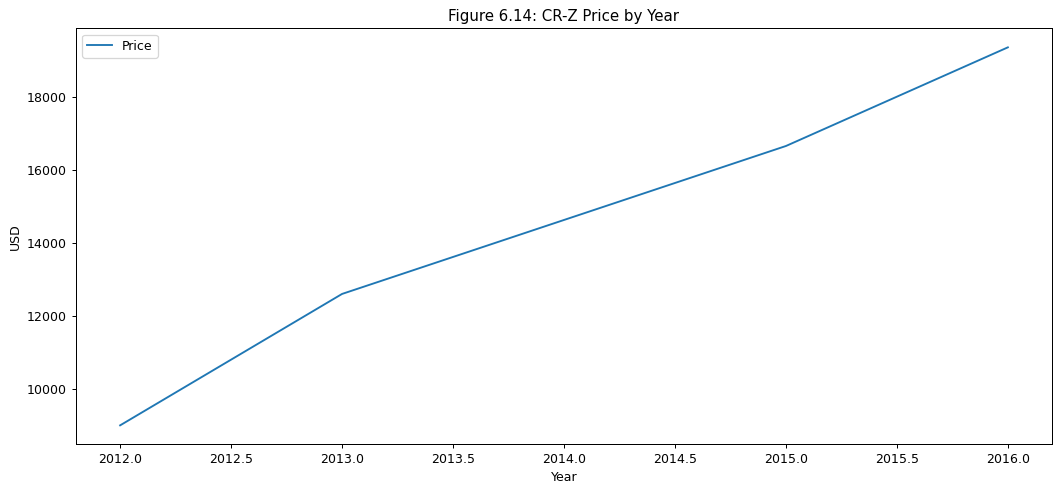

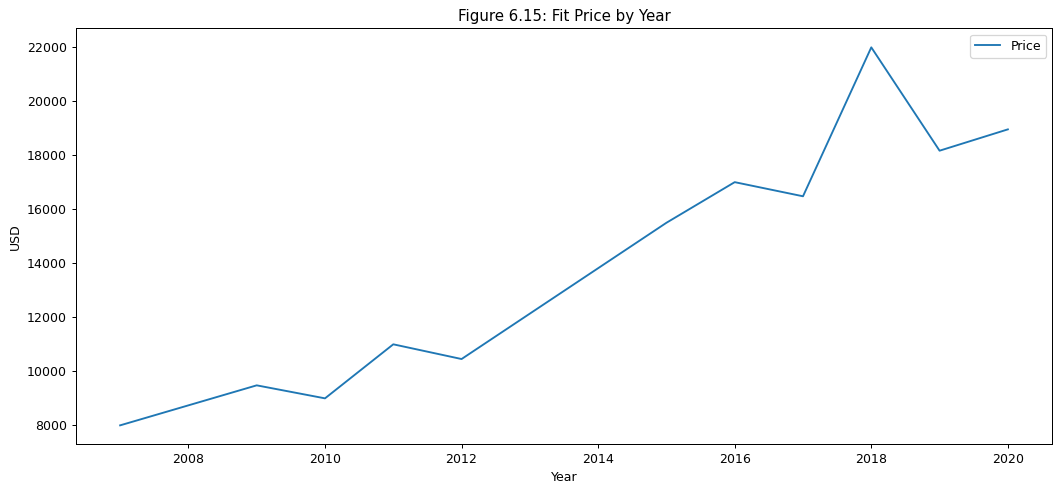

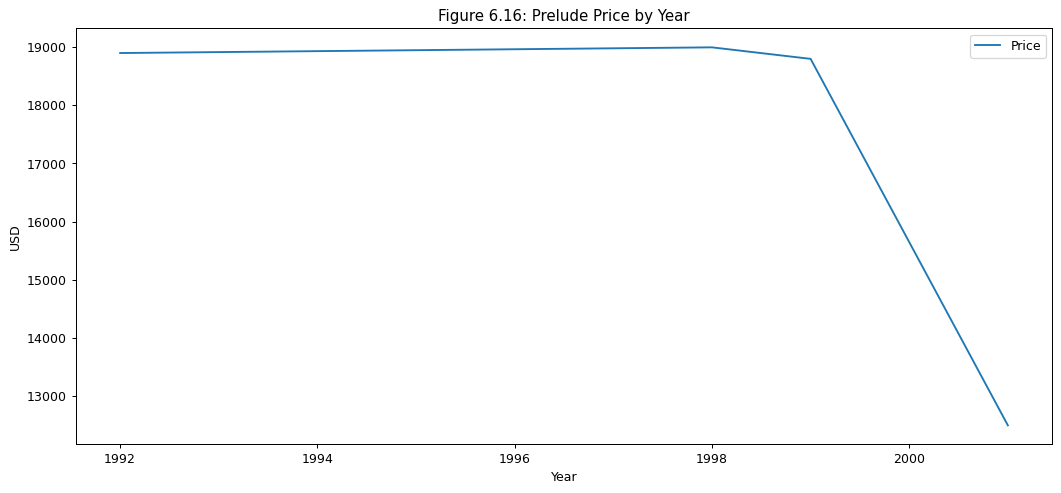

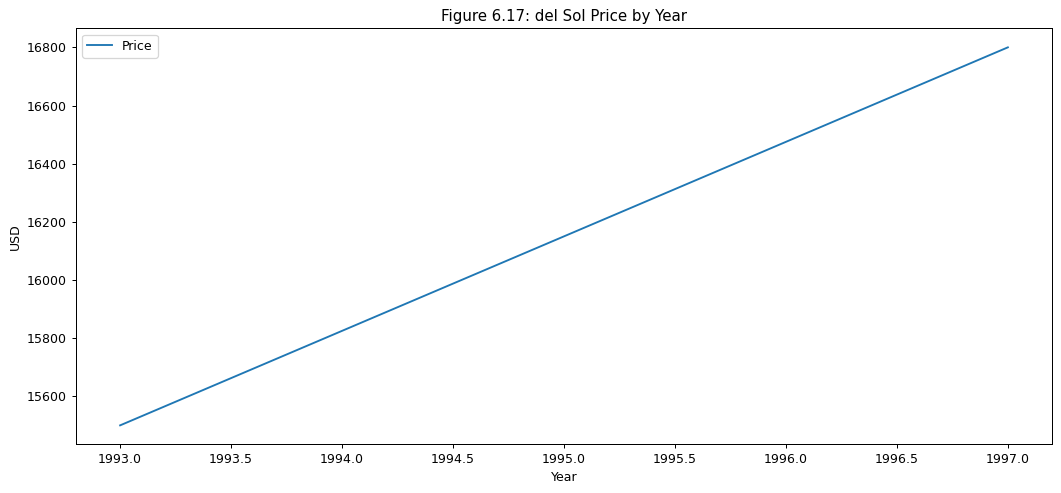

In [30]:
figure_sub_num = 1
for cat in honda_data.Model_Category.unique(): 
    model_data = honda_data[honda_data.Model_Category == cat].groupby(["Year"]).aggregate({
        'Price': lambda value: value.mean(),
    })
    model_data.plot(kind='line')
    plt.title(f"Figure {figure_num}.{figure_sub_num}: {cat} Price by Year")
    figure_sub_num += 1
    plt.ylabel("USD")
figure_num += 1

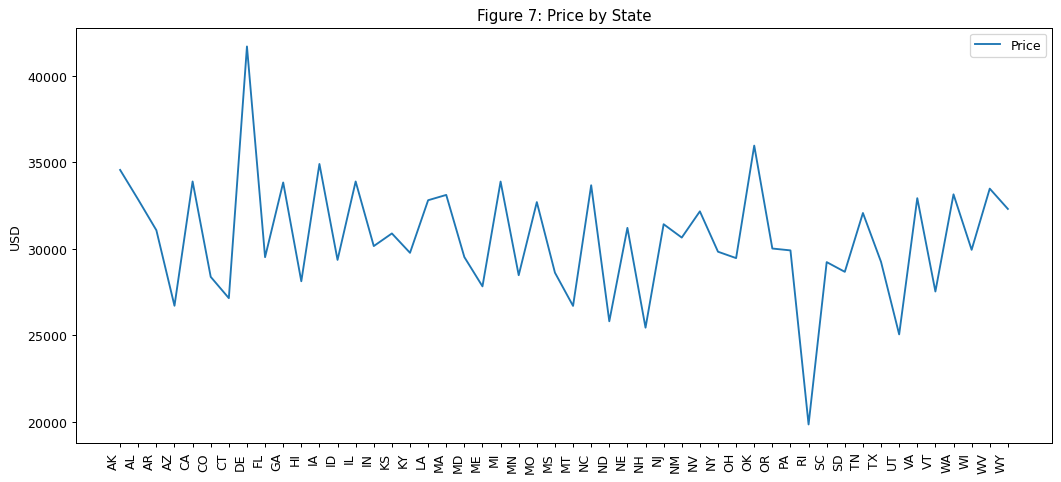

In [31]:
model_data = honda_data[~pd.isna(honda_data.State)].groupby(["State"]).aggregate({
    'Price': lambda value: value.mean()
})
model_data.plot(kind='line')
plt.xticks(range(len(model_data.index)), model_data.index, rotation=90, ha="right")
plt.title(f"Figure {figure_num}: Price by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("USD")
plt.show()

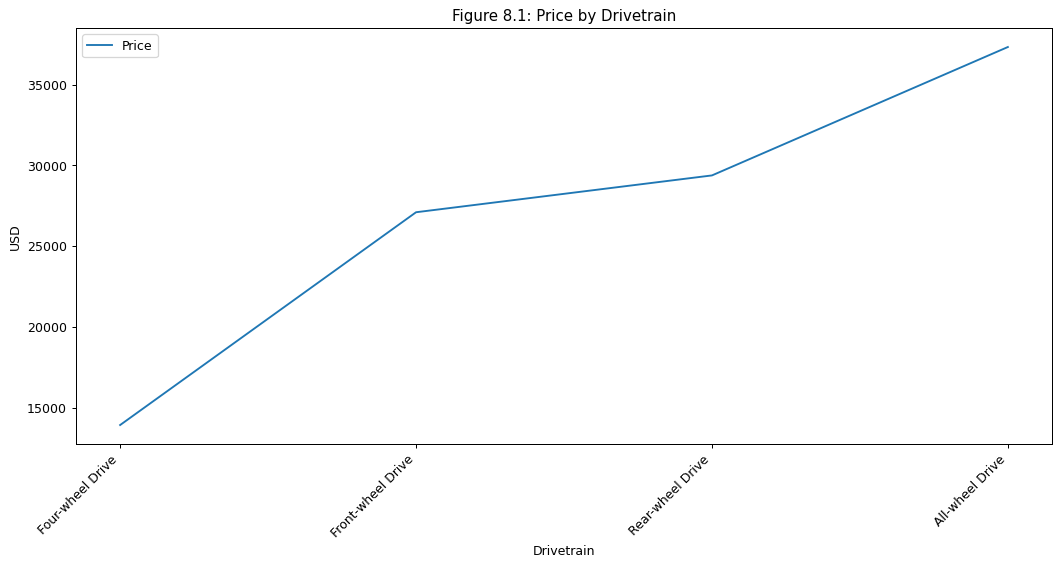

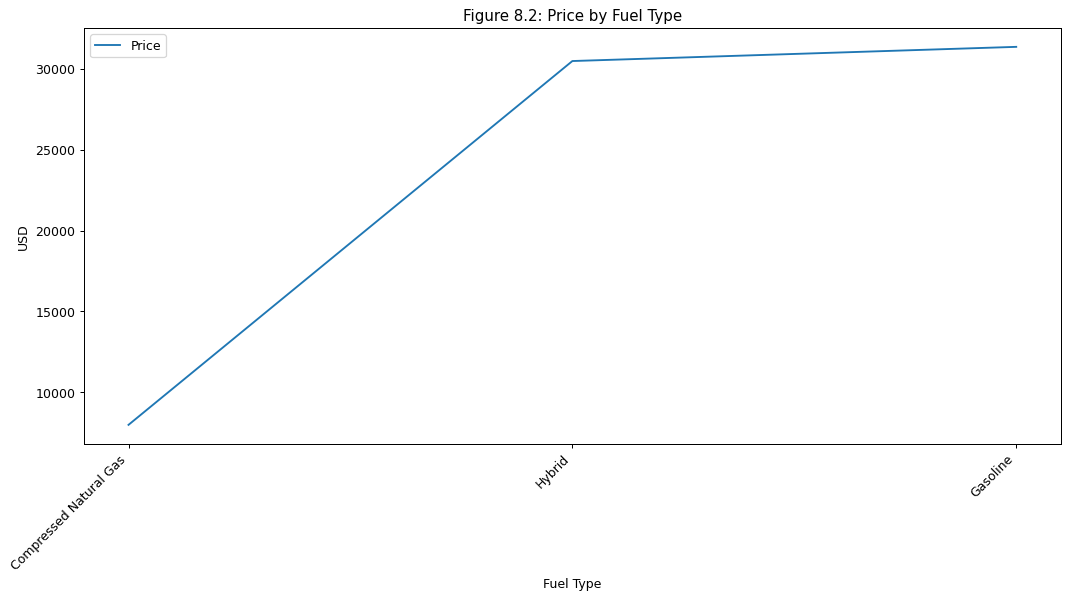

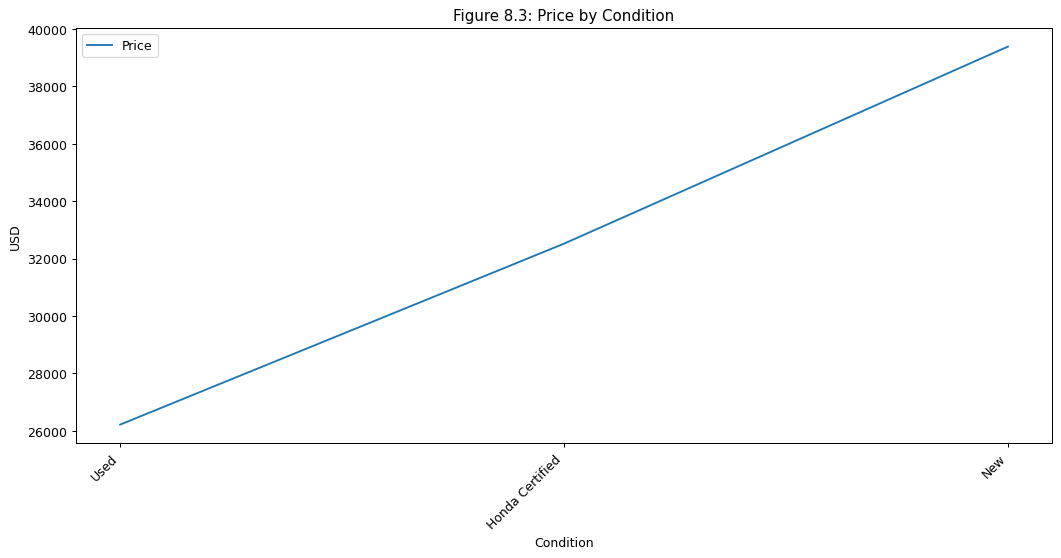

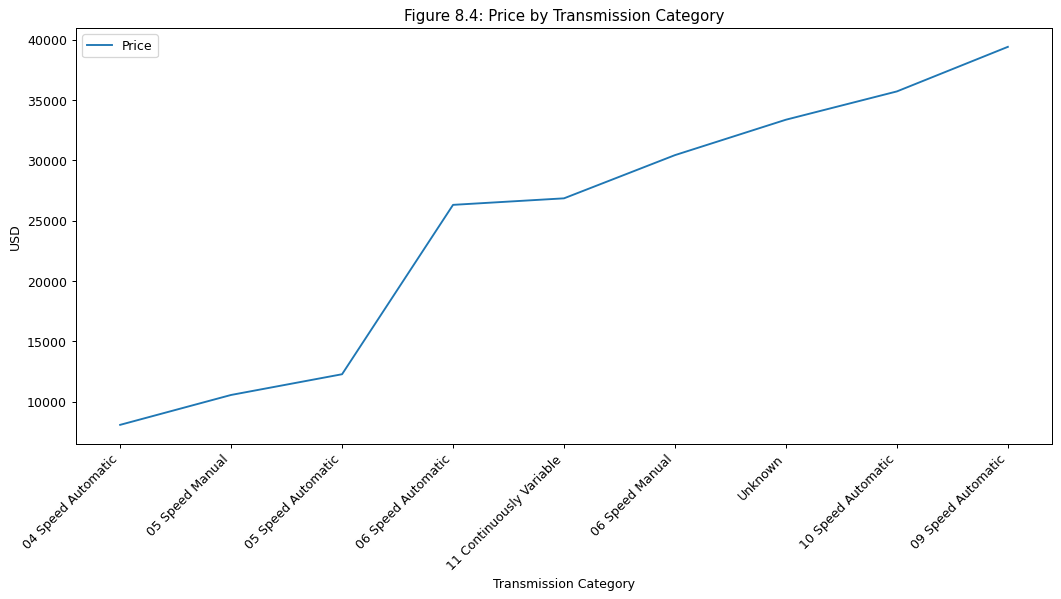

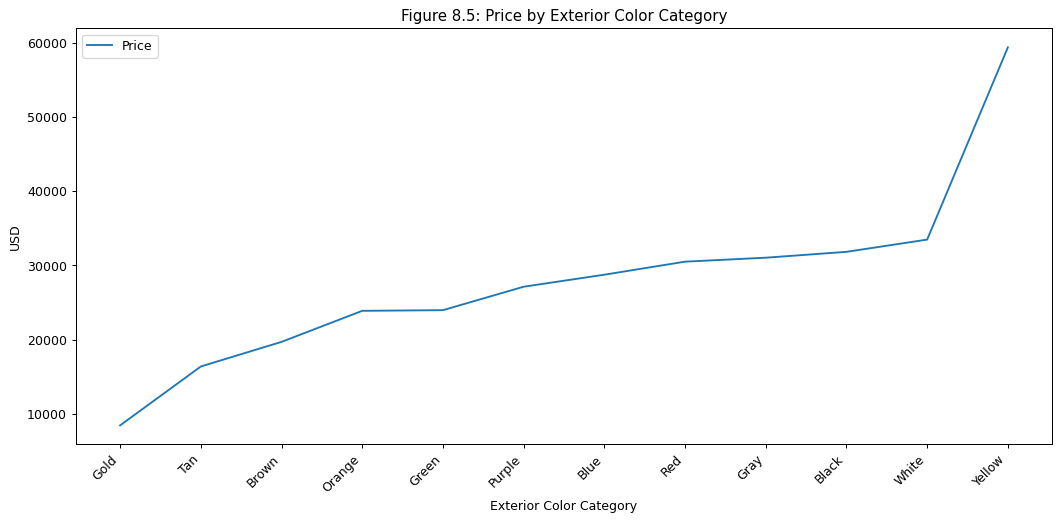

In [32]:
figure_sub_num = 1 
variable = ["Drivetrain", "Fuel_Type", "Condition", "Transmission_Category", "Exterior_Color_Category"]
for var_type in variable: 
    name_fix = var_type.replace("_", " ")
    model_data = honda_data.groupby([var_type]).aggregate({
        'Price': "mean"
    }).sort_values('Price')
    model_data.plot(kind='line')
    plt.xticks(np.arange(len(model_data.index)), model_data.index, rotation=45, ha="right")
    plt.title(f"Figure {figure_num}.{figure_sub_num}: Price by {name_fix}")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("USD")
    plt.show()
figure_num += 1

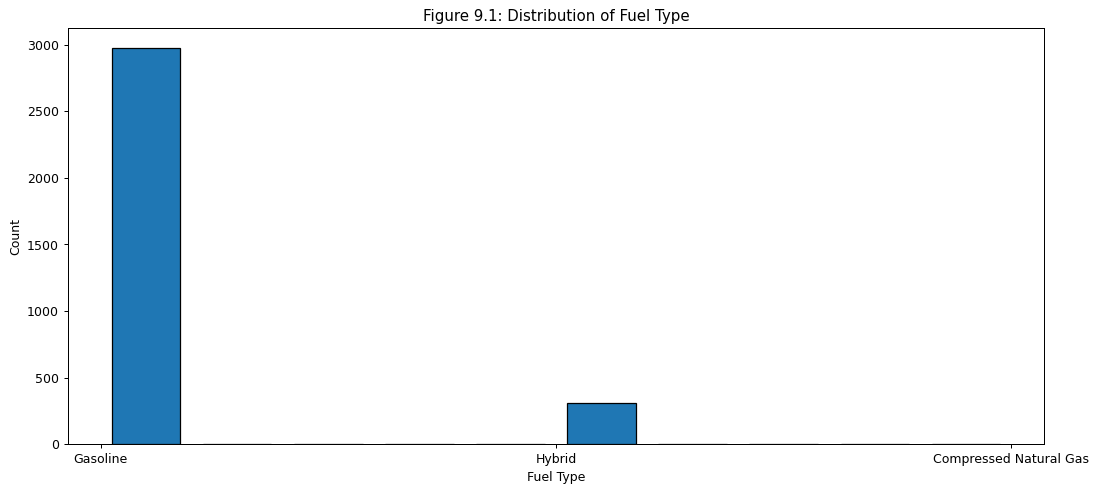

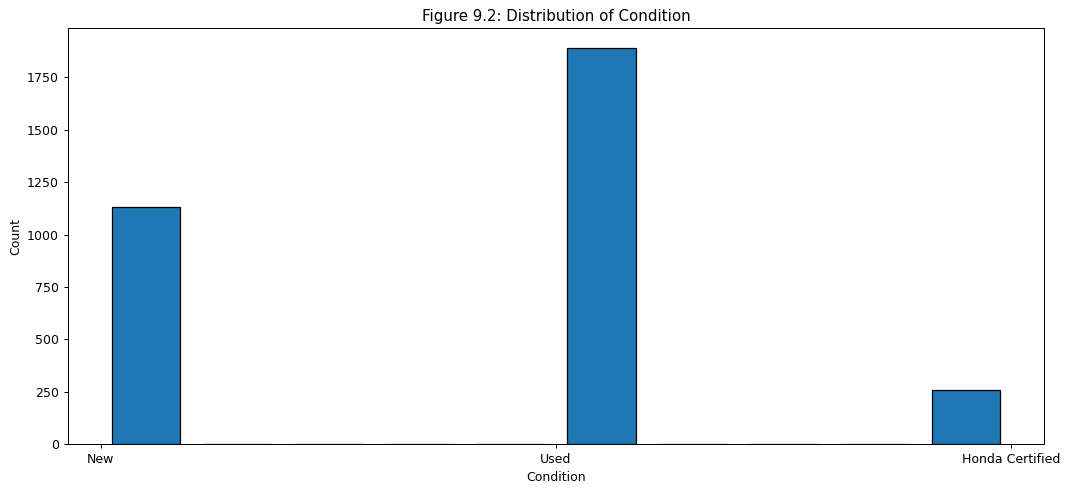

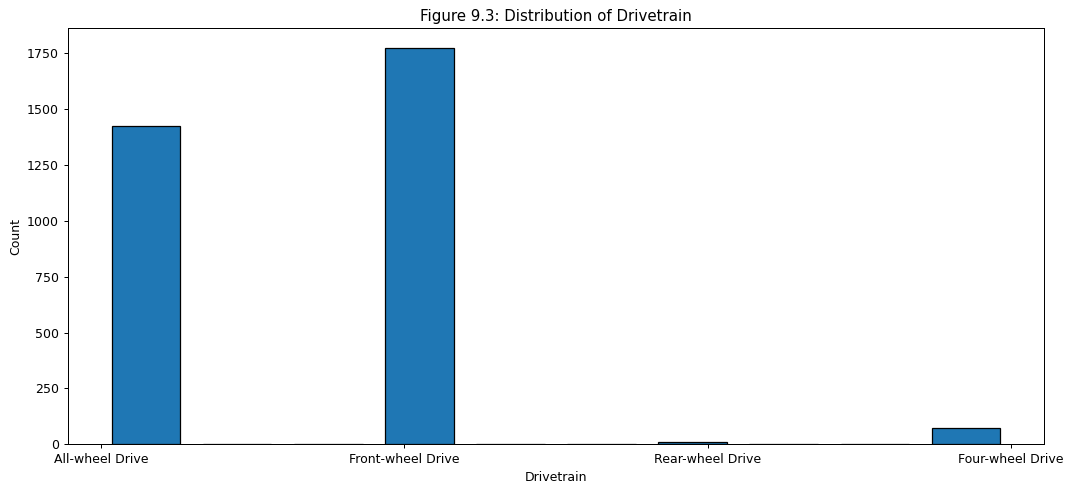

In [33]:
figure_sub_num = 1
properties = ["Fuel_Type", "Condition", "Drivetrain"]
for p in properties:
    name_fix = p.replace("_", " ")
    plt.hist(honda_data[~pd.isna(honda_data[p])][p], edgecolor='black', rwidth=0.75)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: Distribution of {name_fix}")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("Count")
    plt.show() 
figure_num += 1

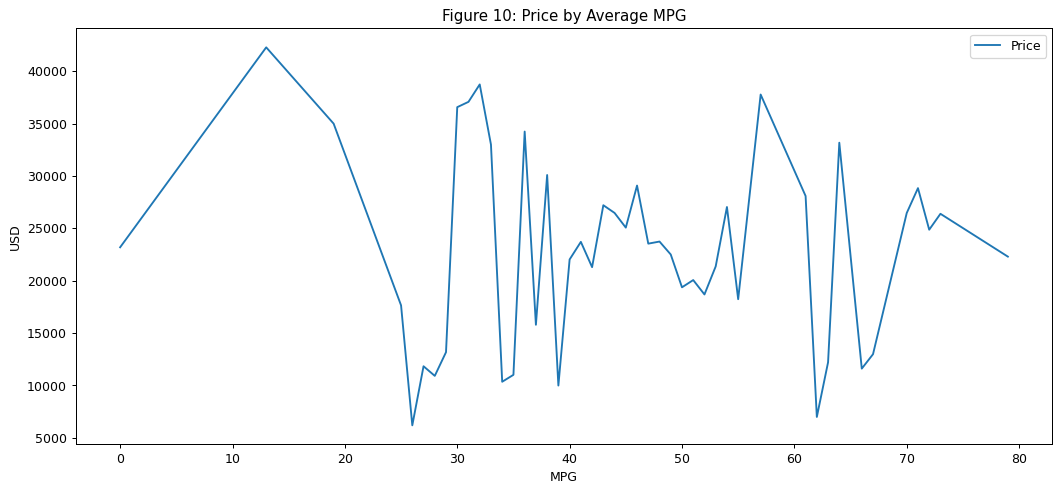

In [34]:
model_data = honda_data.dropna(subset='Average_MPG')
model_data.Model_Category
plot_data = model_data.groupby(["Average_MPG"]).aggregate({
    'Price': lambda value: round(value.mean(), 2),
})
plot_data.plot(kind='line')
plt.title(f"Figure {figure_num}: Price by Average MPG")
figure_num += 1
plt.xlabel("MPG")
plt.ylabel("USD")   
plt.show()

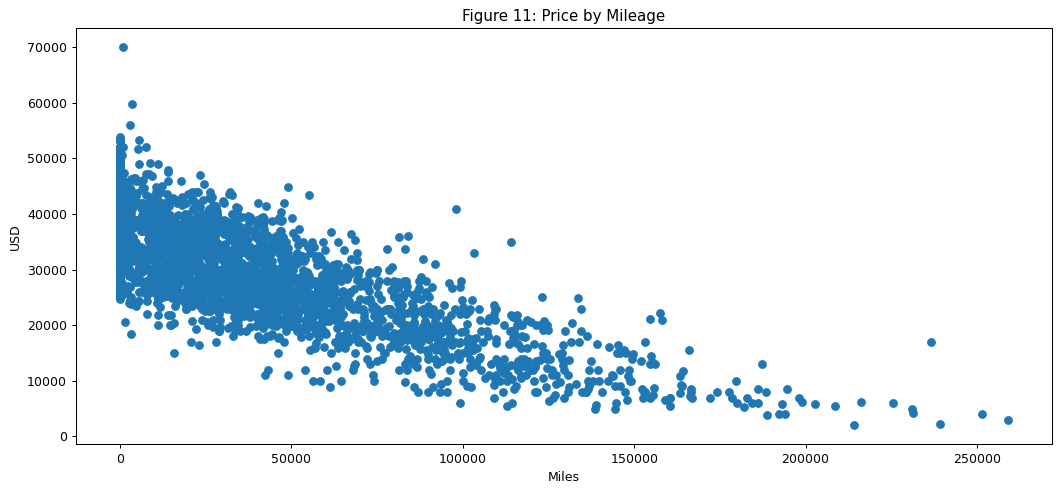

In [35]:
plot_data = honda_data[(~pd.isna(honda_data.Price)) & (~pd.isna(honda_data.Mileage))]
plt.scatter(plot_data.Mileage, plot_data.Price)
plt.title(f"Figure {figure_num}: Price by Mileage")
figure_num += 1
plt.xlabel("Miles")
plt.ylabel("USD")
plt.show()

In [36]:
##########################################################
#
# Question 2. What states have the highest or lowest cost?
#
##########################################################

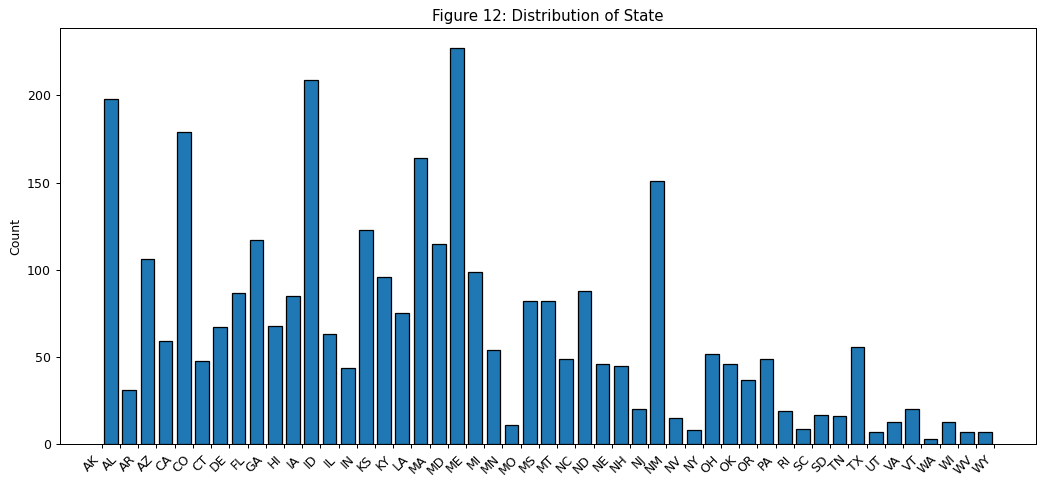

In [37]:
state_data = honda_data.loc[~pd.isna(honda_data.State),"State"]
states = state_data.sort_values().unique()
plt.hist(honda_data.loc[~pd.isna(honda_data.State),"State"], edgecolor='black', rwidth=0.75, bins=range(50))
plt.xticks(ticks=range(50), labels=states, rotation=45, ha="right")
plt.title(f"Figure {figure_num}: Distribution of State")
figure_num += 1
plt.xlabel("")
plt.ylabel("Count")
plt.show()

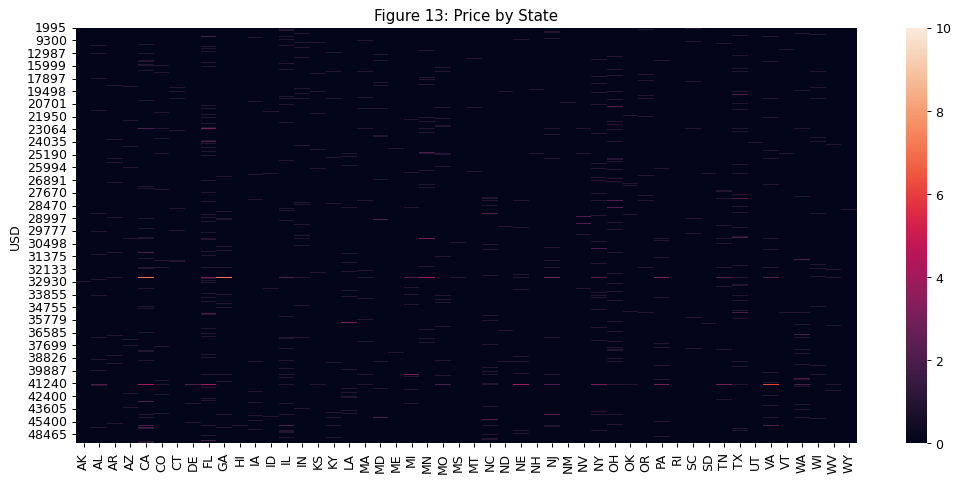

In [38]:
sns.heatmap(pd.crosstab(honda_data['State'], honda_data['Price']).transpose())
plt.title(f"Figure {figure_num}: Price by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("USD")   
plt.show()

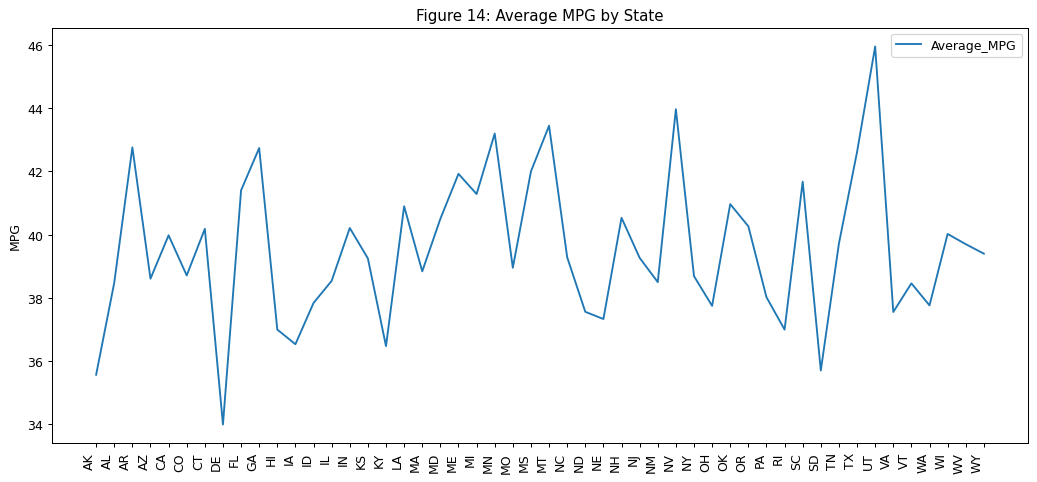

In [39]:
model_data = honda_data[~pd.isna(honda_data.State)].groupby(["State"]).aggregate({
    'Average_MPG': lambda value: value.mean()
})
model_data.plot(kind='line')
plt.xticks(range(len(model_data.index)), model_data.index, rotation=90, ha="right")
plt.title(f"Figure {figure_num}: Average MPG by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("MPG") 
plt.show()

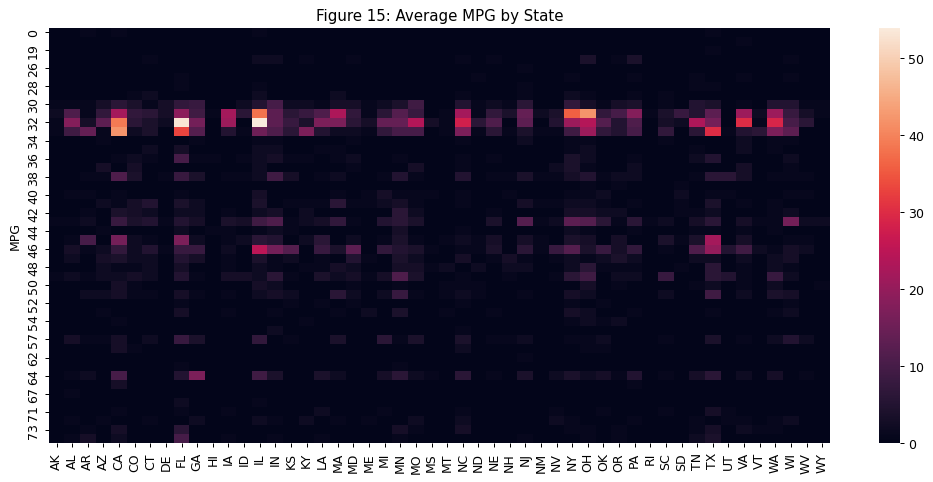

In [40]:
# california, florida, georgia and illinois have most cars at highest mpg
sns.heatmap(pd.crosstab(honda_data['Average_MPG'], honda_data['State']))
plt.title(f"Figure {figure_num}: Average MPG by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("MPG") 
plt.show()

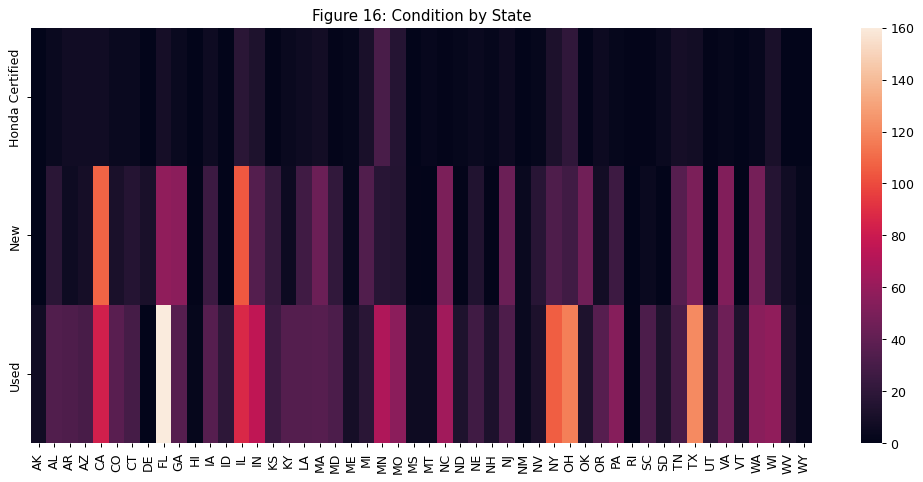

In [41]:
# certified - MN
# new - ca
# used - fl
sns.heatmap(pd.crosstab(honda_data['Condition'], honda_data['State']))
plt.title(f"Figure {figure_num}: Condition by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("") 
plt.show()

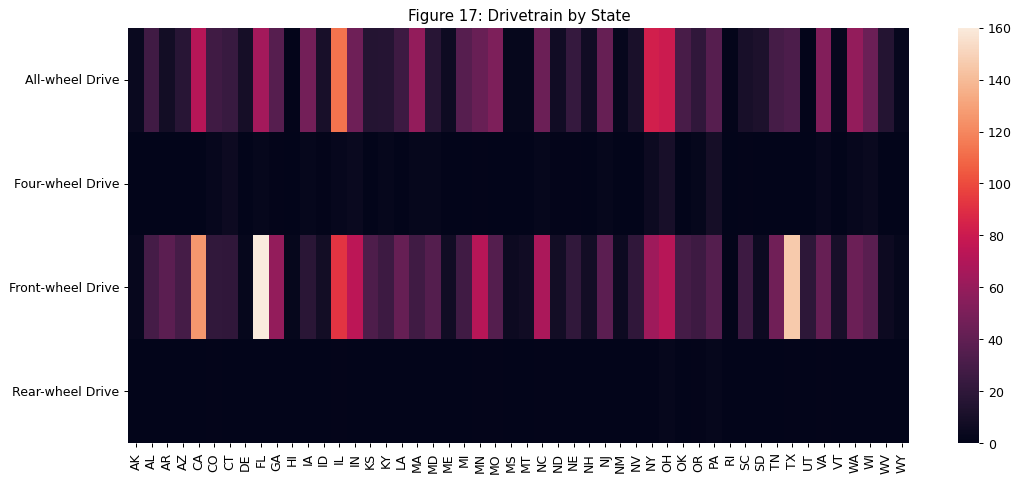

In [42]:
sns.heatmap(pd.crosstab(honda_data['Drivetrain'], honda_data['State']))
plt.title(f"Figure {figure_num}: Drivetrain by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("") 
plt.show()

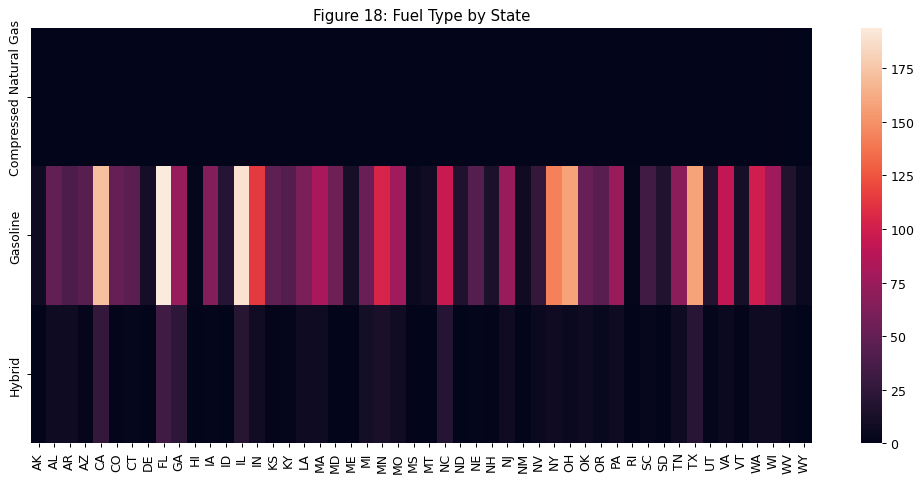

In [43]:
# most hybrids - ca, fl, ga, il, in, mn, mo, nc, nj, oh, tx
sns.heatmap(pd.crosstab(honda_data['Fuel_Type'], honda_data['State']))
plt.title(f"Figure {figure_num}: Fuel Type by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("") 
plt.show()

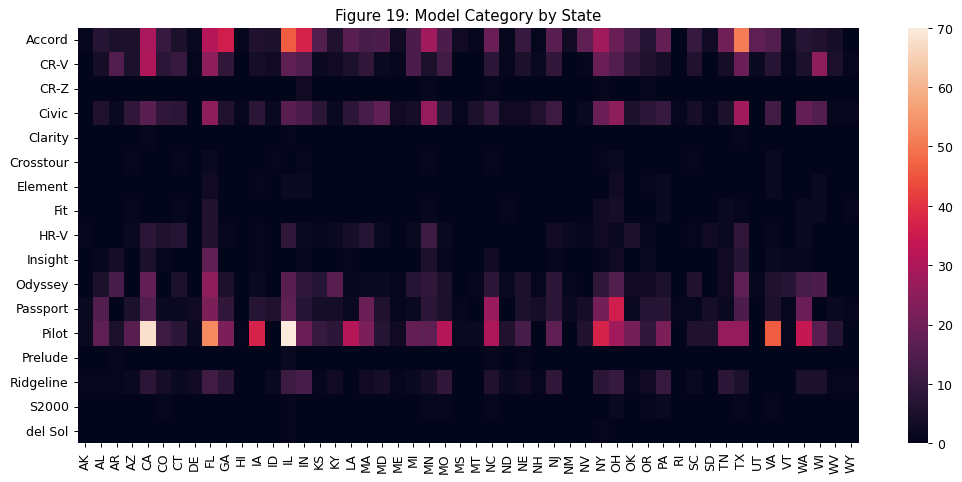

In [44]:
sns.heatmap(pd.crosstab(honda_data['Model_Category'], honda_data['State']))
plt.title(f"Figure {figure_num}: Model Category by State")
figure_num += 1
plt.xlabel("")
plt.ylabel("") 
plt.show()

In [45]:
###########################################################
#
# Question 3. How has MPG changed over the years per model?
#
###########################################################

In [67]:
honda_data['Average_MPG'].describe()

count       3282.0
mean     39.777575
std      10.891804
min            0.0
25%           32.0
50%           33.0
75%           46.0
max           79.0
Name: Average_MPG, dtype: Float64

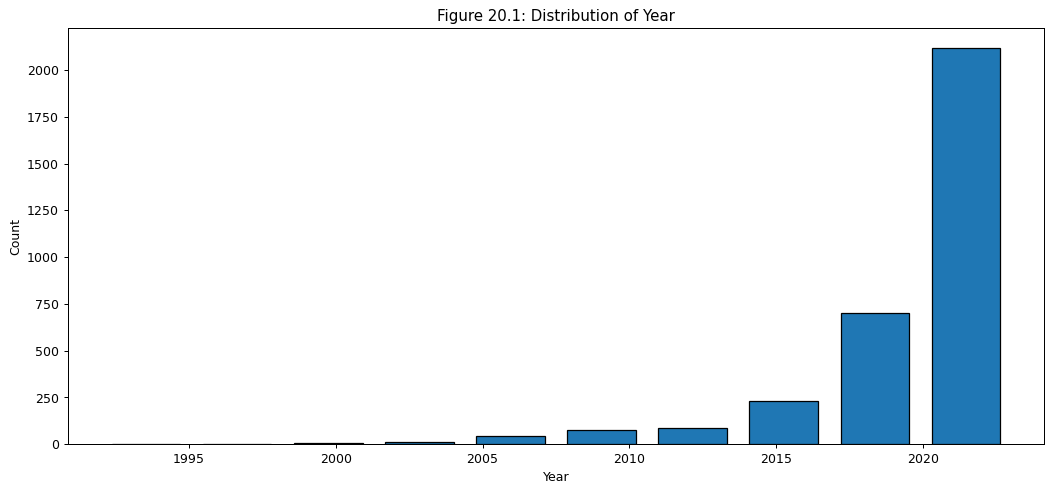

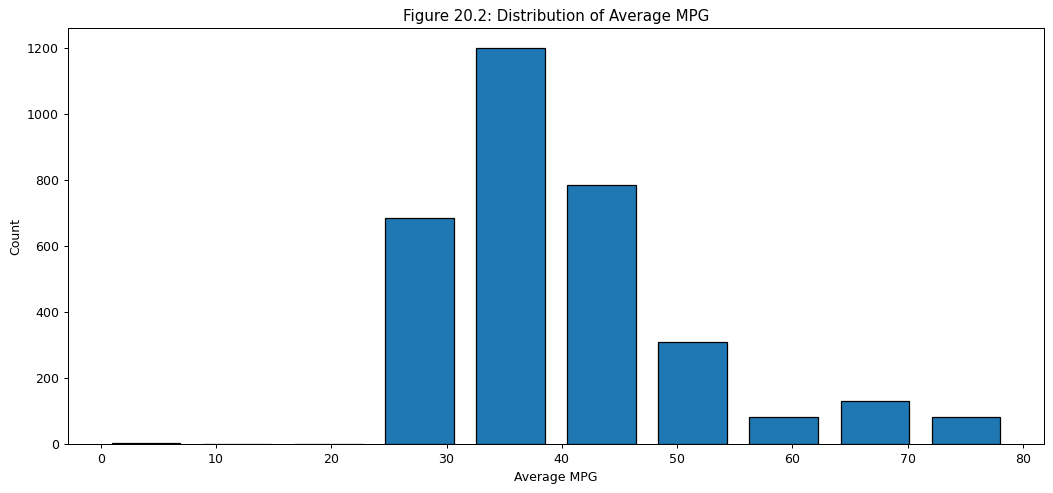

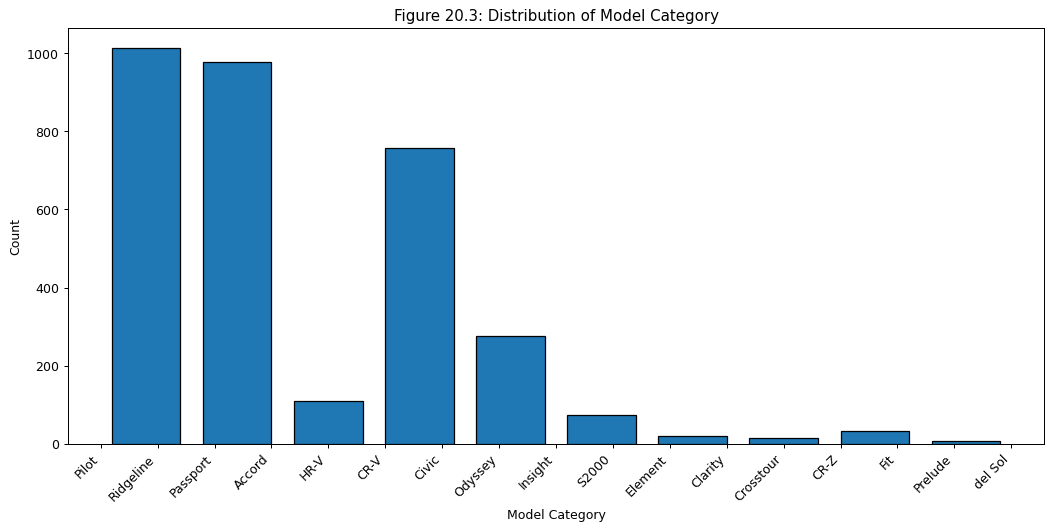

In [46]:
figure_sub_num = 1
values = ["Year", "Average_MPG"]
for v in values:
    name_fix = v.replace("_", " ")
    plt.hist(honda_data[honda_data[v] != None][v], edgecolor='black', rwidth=0.75)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: Distribution of {name_fix}")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("Count")
    plt.show() 

cat_data = honda_data[honda_data.Model_Category != None]
plt.hist(cat_data.Model_Category, edgecolor='black', rwidth=0.75)
cats = cat_data.Model_Category.unique()
plt.xticks(ticks=range(len(cats)), labels=cats, rotation=45, ha="right")
plt.title(f"Figure {figure_num}.{figure_sub_num}: Distribution of Model Category")
figure_num += 1
plt.xlabel("Model Category")
plt.ylabel("Count")
plt.show() 

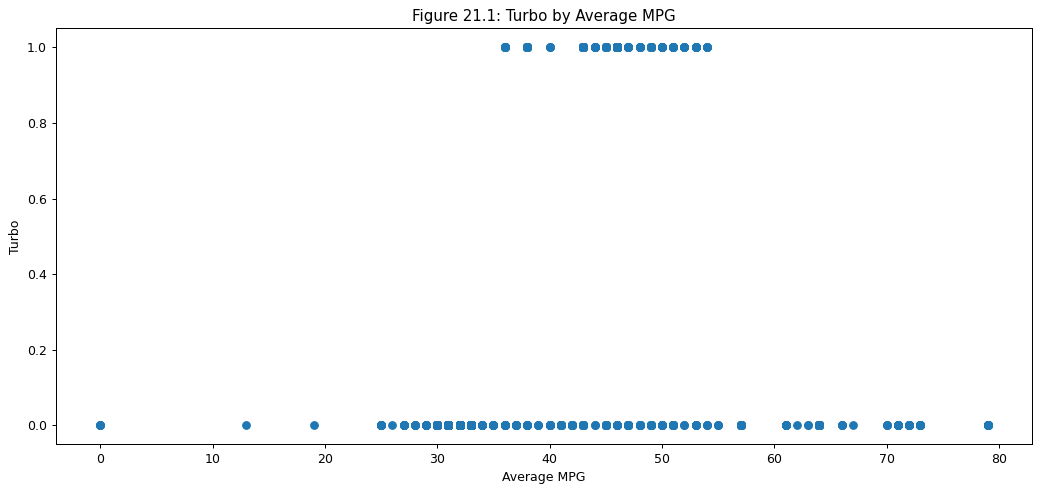

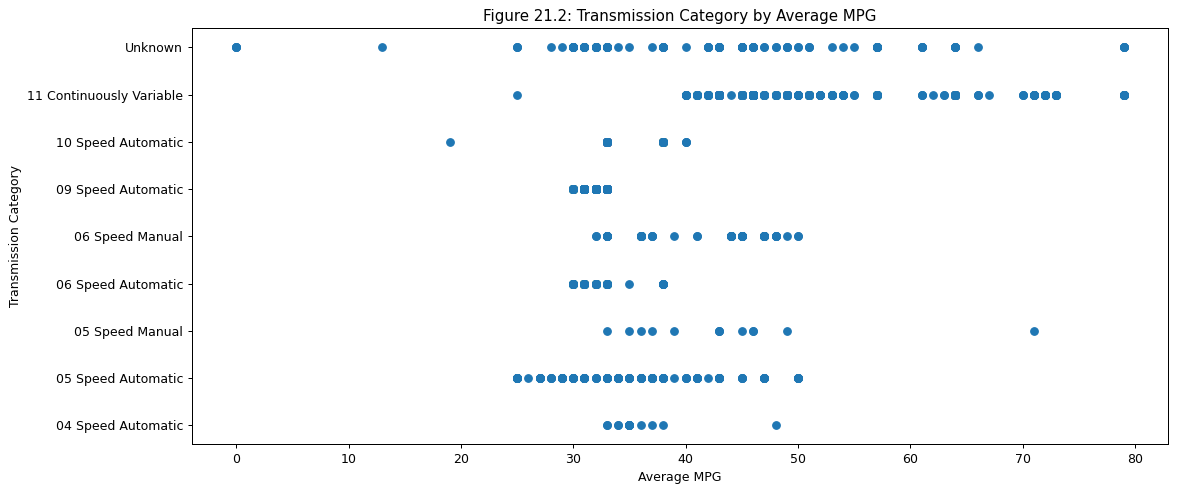

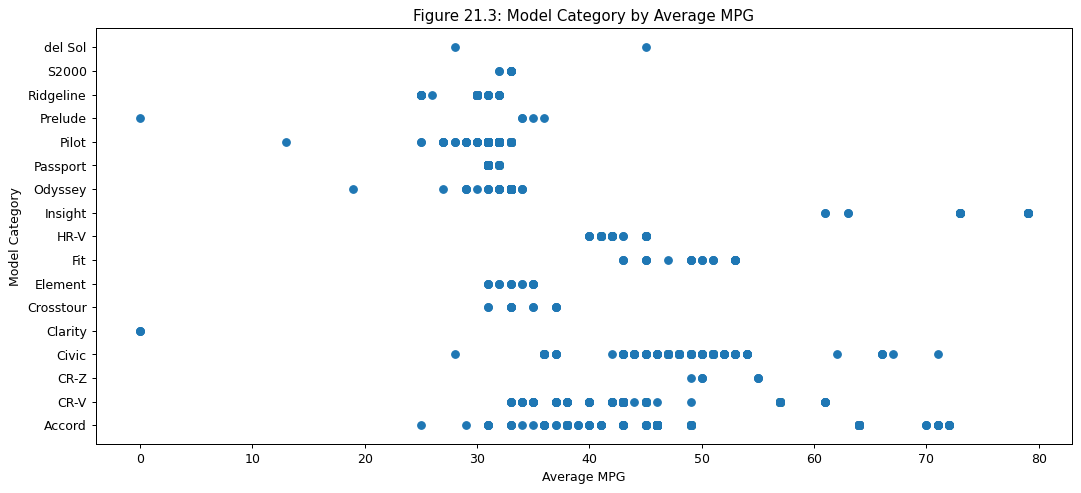

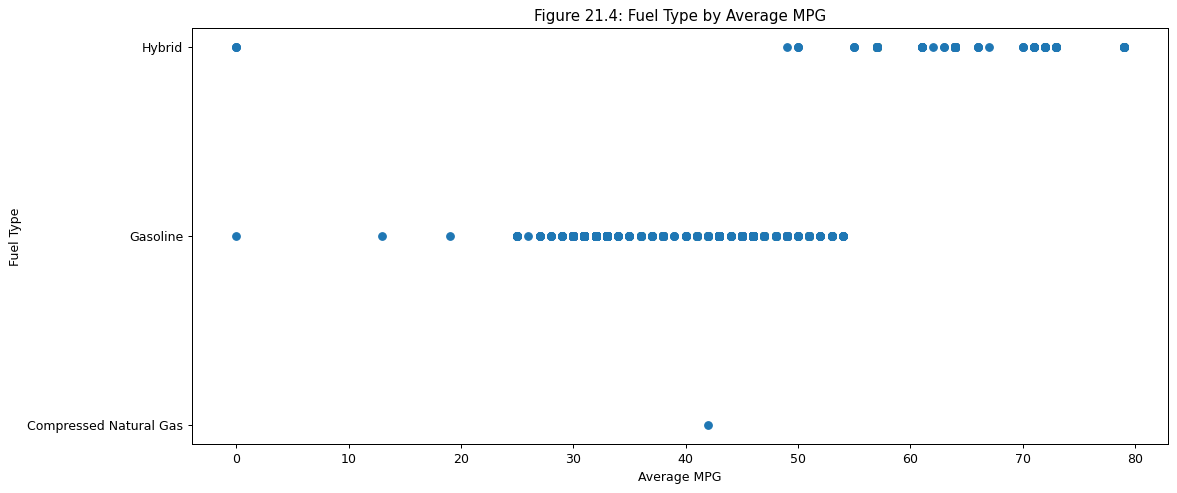

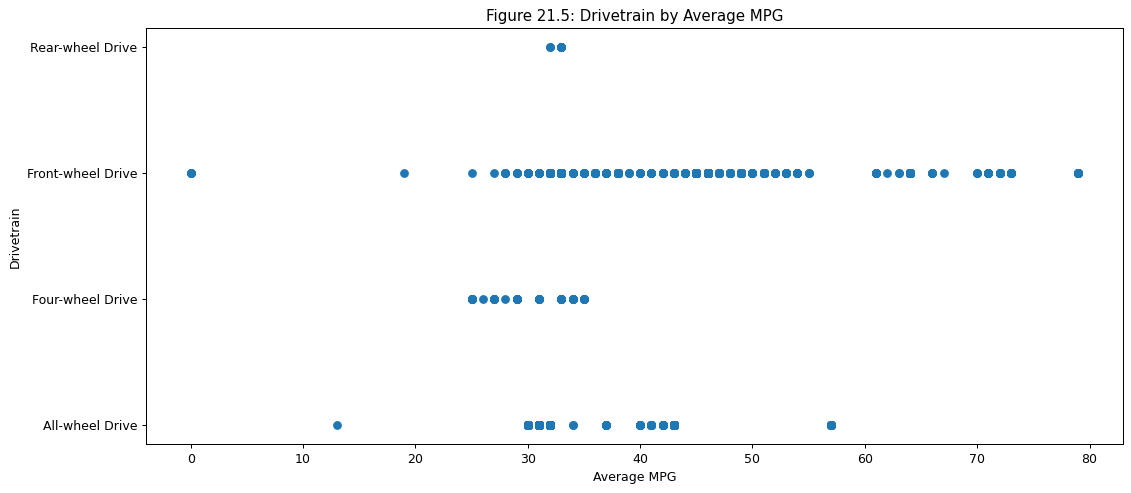

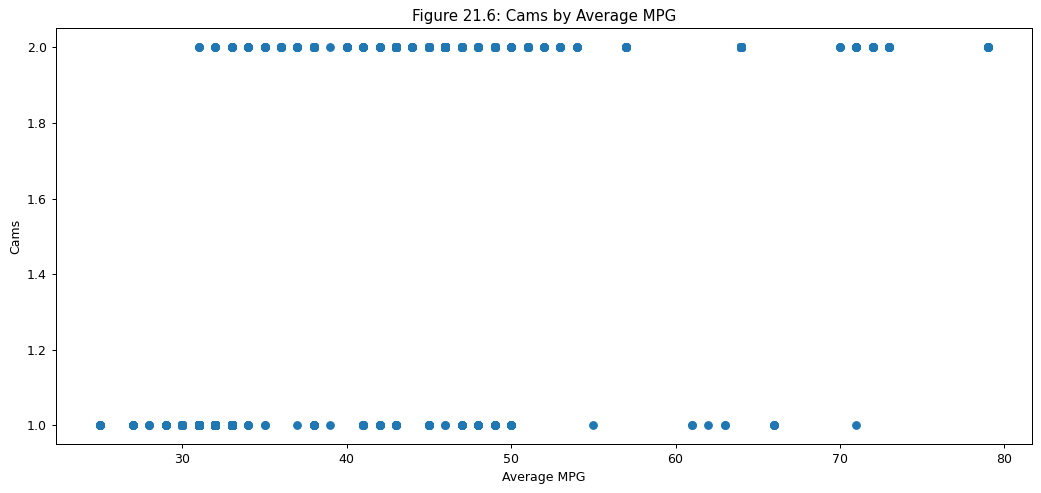

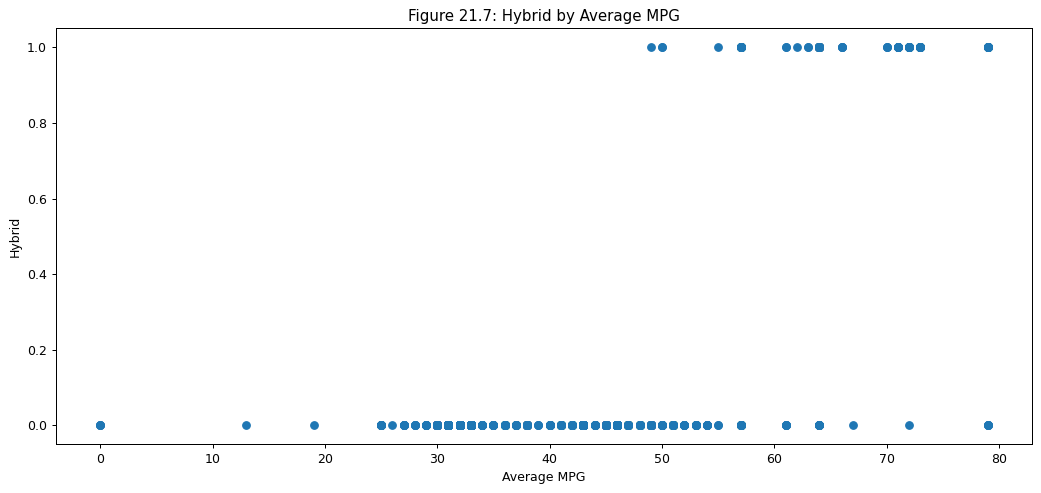

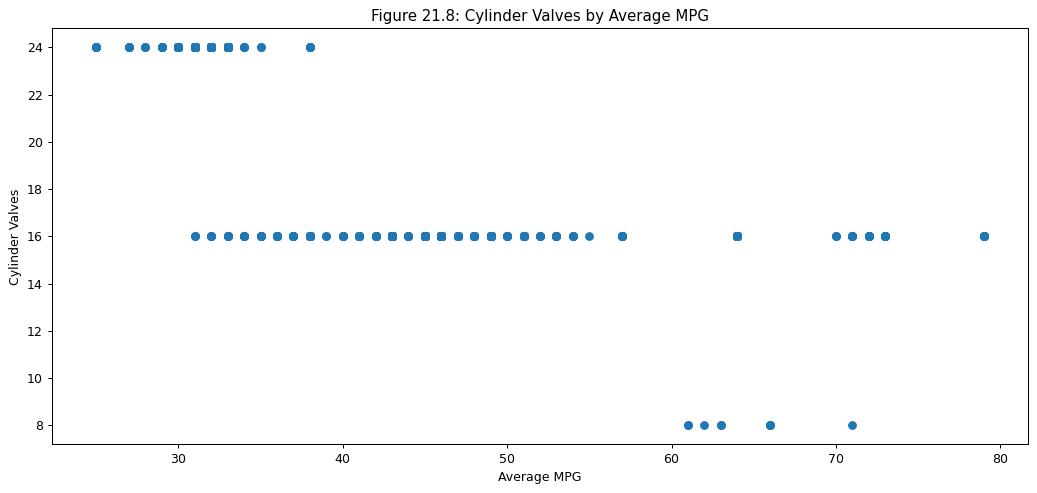

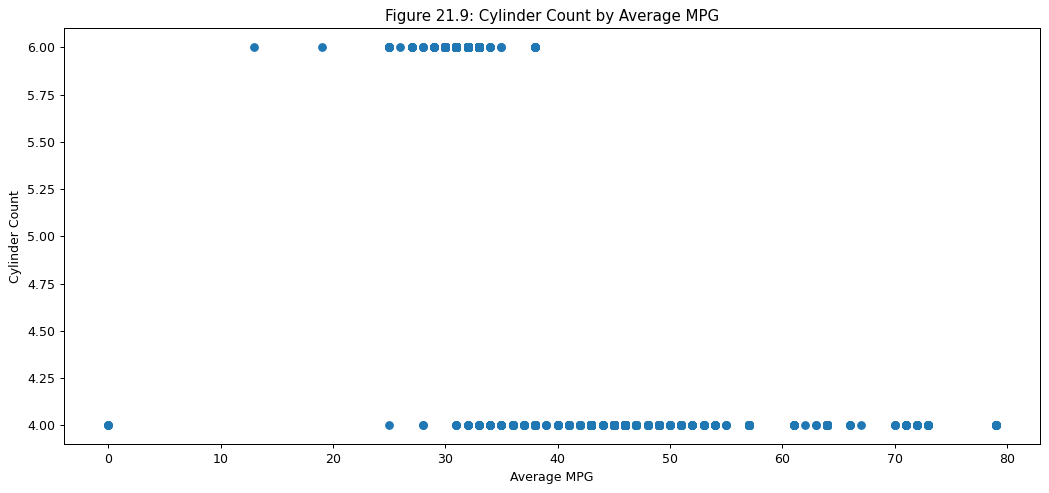

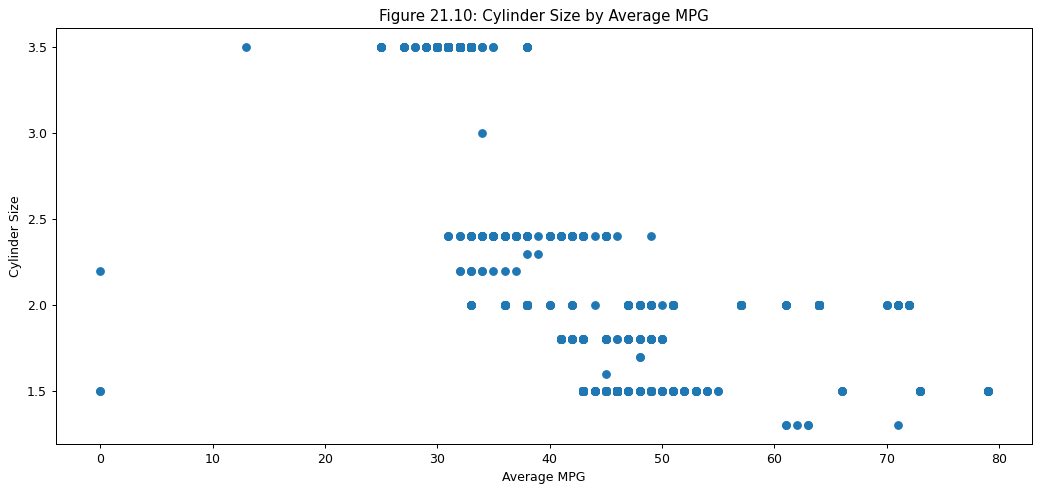

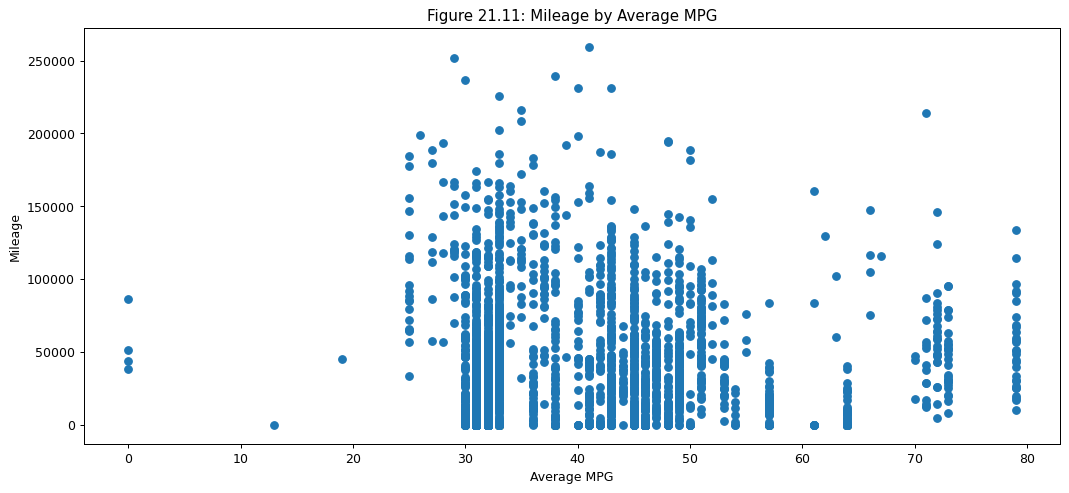

In [47]:
values = ["Turbo", 
          "Transmission_Category", 
          "Model_Category", 
          "Fuel_Type", 
          "Drivetrain", 
          "Cams", 
          "Hybrid", 
          "Cylinder_Valves", 
          "Cylinder_Count", 
          "Cylinder_Size", 
          "Mileage"]
figure_sub_num = 1
for v in values:
    name_fix = v.replace("_", " ")
    plot_data = honda_data[(~pd.isna(honda_data.Average_MPG)) & (~pd.isna(honda_data[v]))].sort_values(v)
    plt.scatter(plot_data.Average_MPG, plot_data[v])
    plt.title(f"Figure {figure_num}.{figure_sub_num}: {name_fix} by Average MPG")
    figure_sub_num += 1
    plt.xlabel("Average MPG")
    plt.ylabel(name_fix)
    plt.show()
figure_num += 1

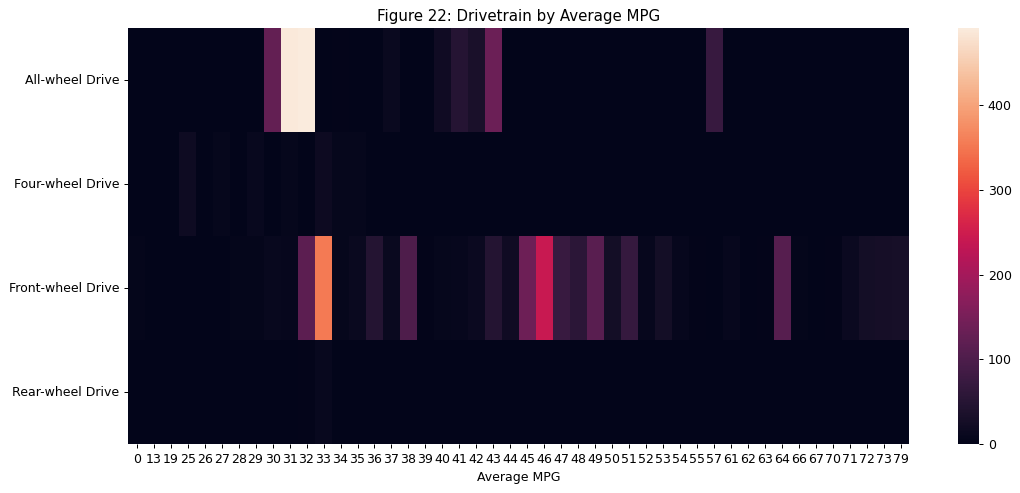

In [48]:
# awd - 32 mpg
# fwd - goes all the range
# rwd - 33 mpg
sns.heatmap(pd.crosstab(honda_data['Drivetrain'], honda_data['Average_MPG']))
plt.title(f"Figure {figure_num}: Drivetrain by Average MPG")
figure_num += 1
plt.xlabel("Average MPG")
plt.ylabel("")
plt.show()

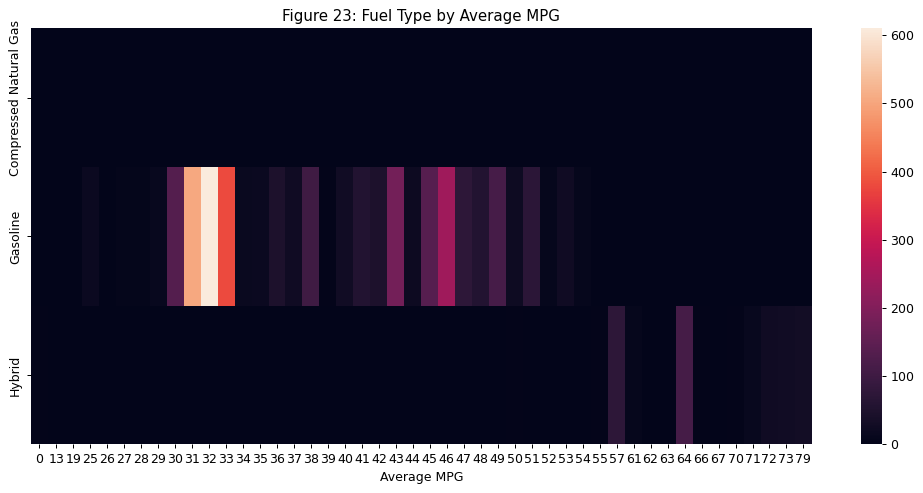

In [49]:
# hybrid has the highest mpg
# gas caps out at 54 mpg
sns.heatmap(pd.crosstab(honda_data['Fuel_Type'], honda_data['Average_MPG']))
plt.title(f"Figure {figure_num}: Fuel Type by Average MPG")
figure_num += 1
plt.xlabel("Average MPG")
plt.ylabel("")
plt.show()

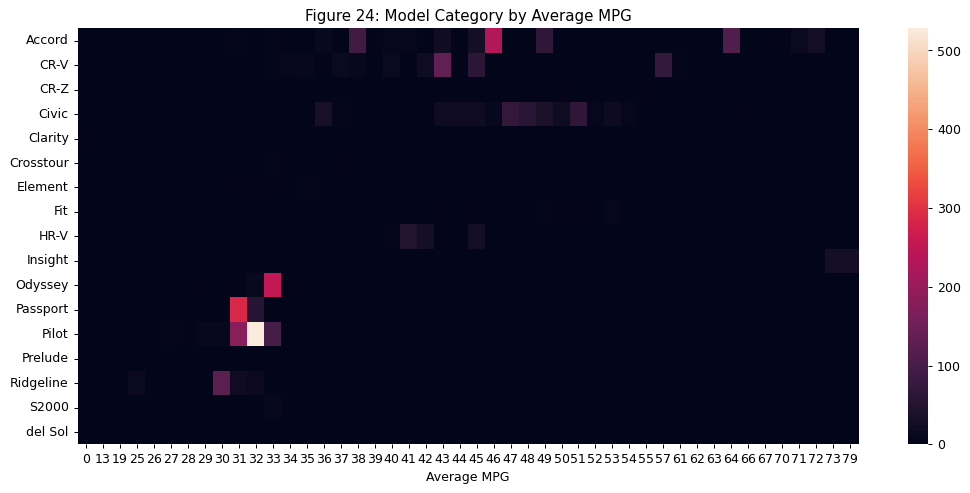

In [50]:
# accord, insight, cr-v
sns.heatmap(pd.crosstab(honda_data['Model_Category'], honda_data['Average_MPG']))
plt.title(f"Figure {figure_num}: Model Category by Average MPG")
figure_num += 1
plt.xlabel("Average MPG")
plt.ylabel("")
plt.show()

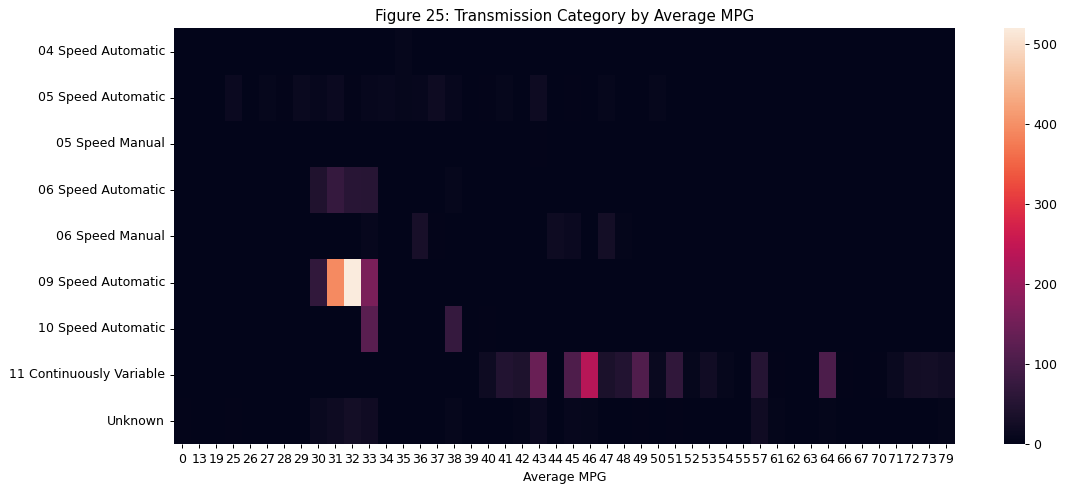

In [51]:
# almost all the speeds hover around 33 mpg
# 5 speed auto, 6 speed manual have some higher mpg
# continuously variable gets the best mpg
sns.heatmap(pd.crosstab(honda_data['Transmission_Category'], honda_data['Average_MPG']))
plt.title(f"Figure {figure_num}: Transmission Category by Average MPG")
figure_num += 1
plt.xlabel("Average MPG")
plt.ylabel("")
plt.show()

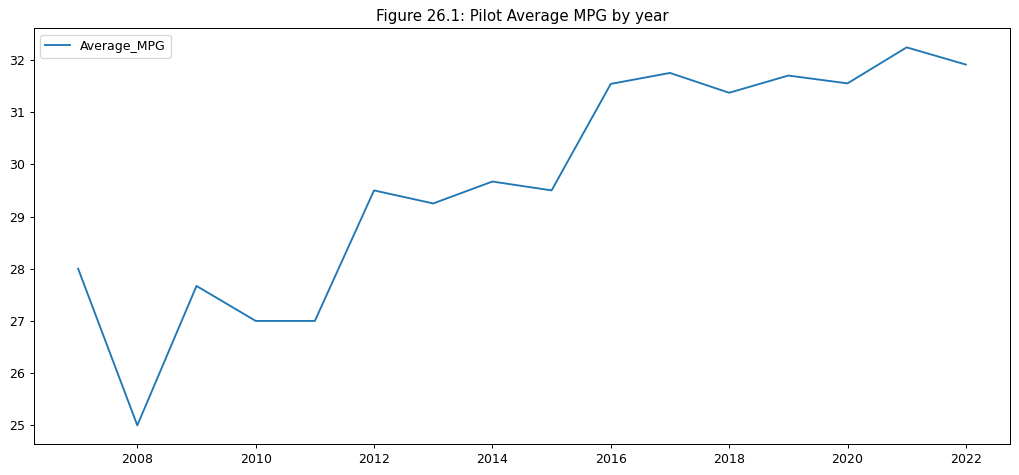

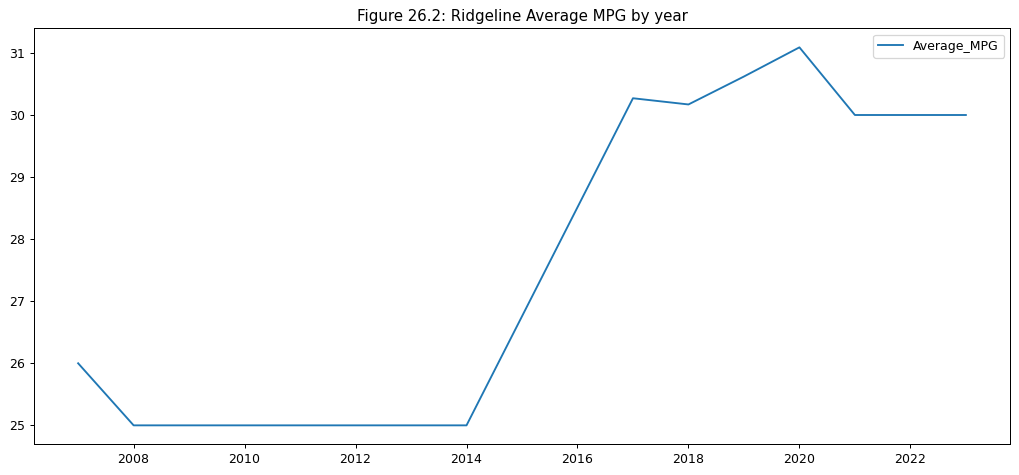

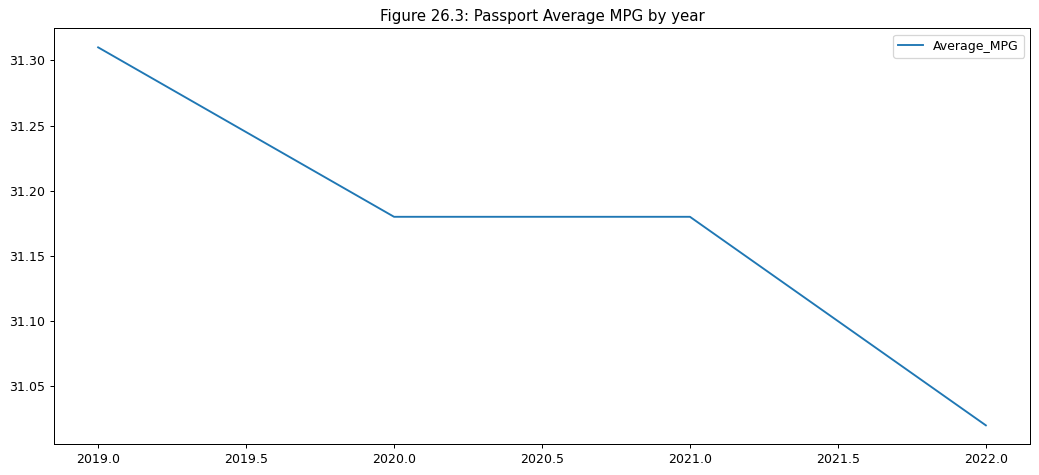

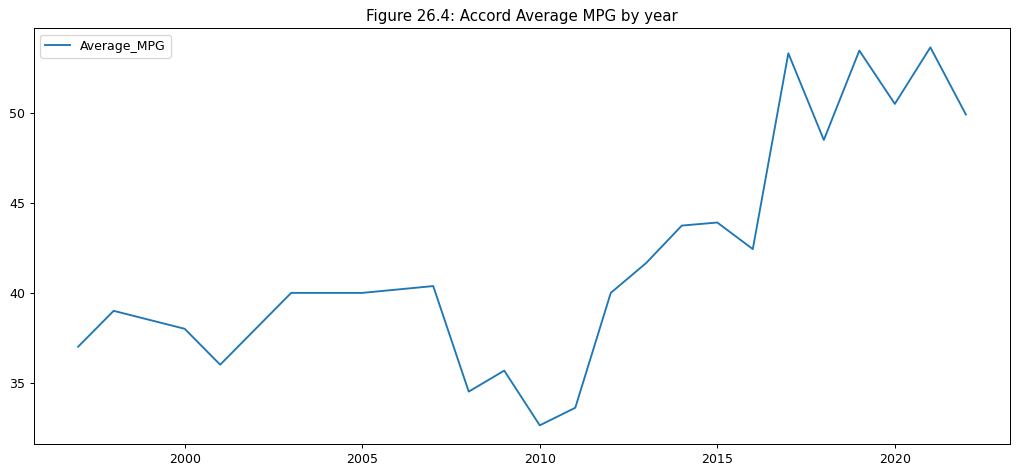

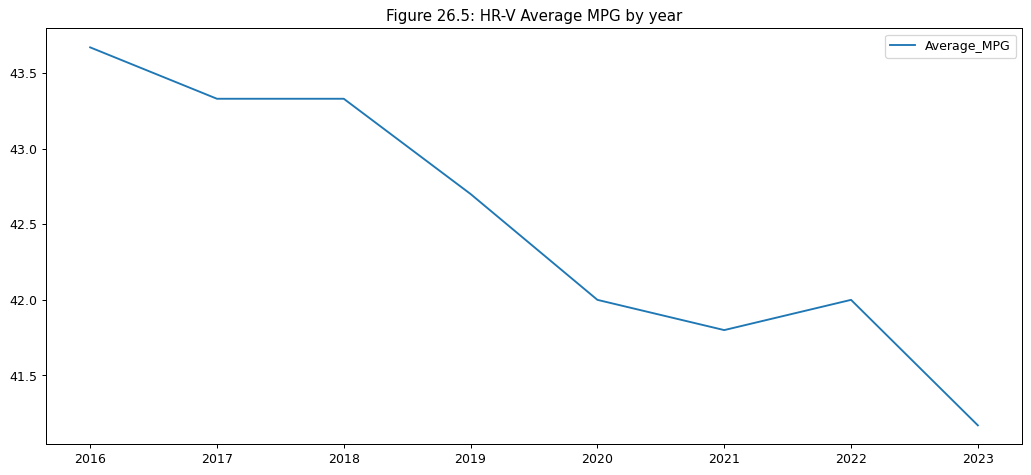

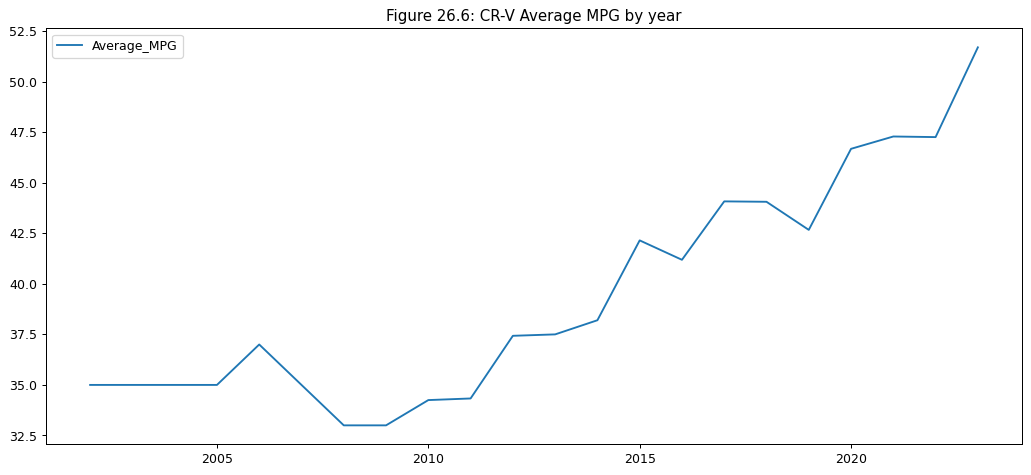

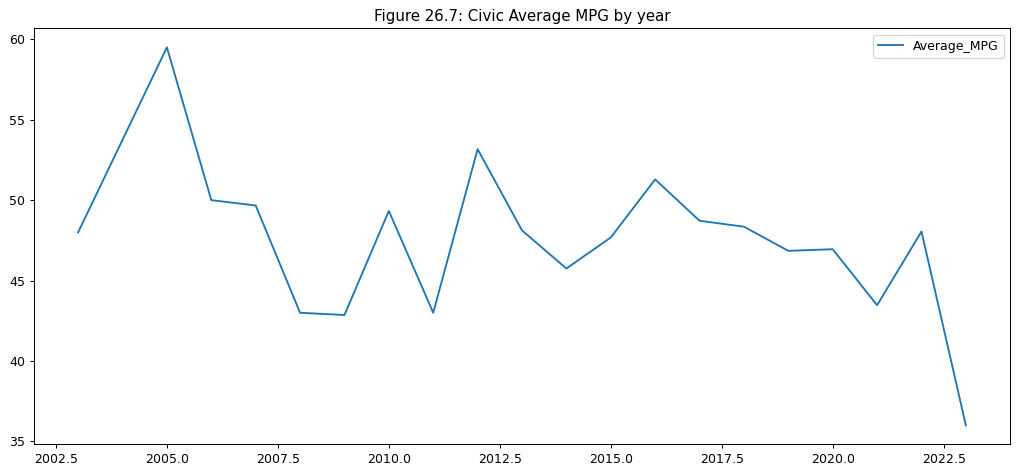

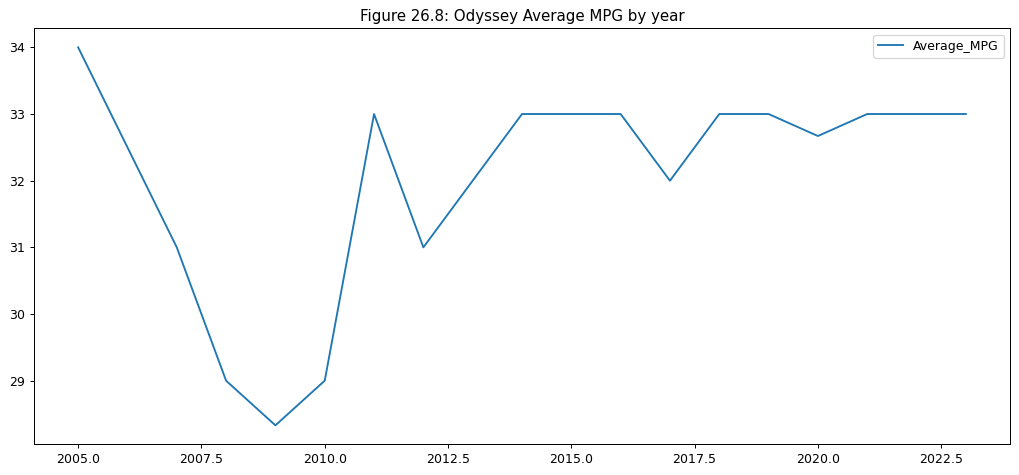

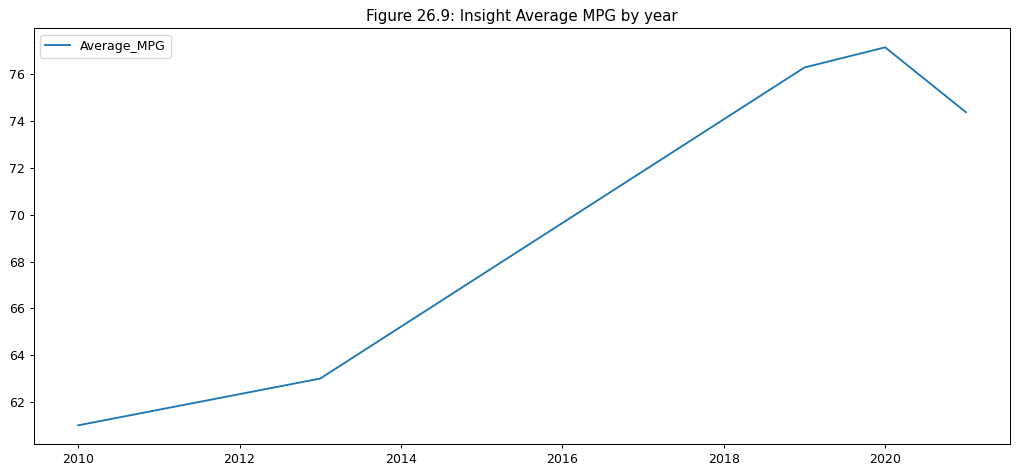

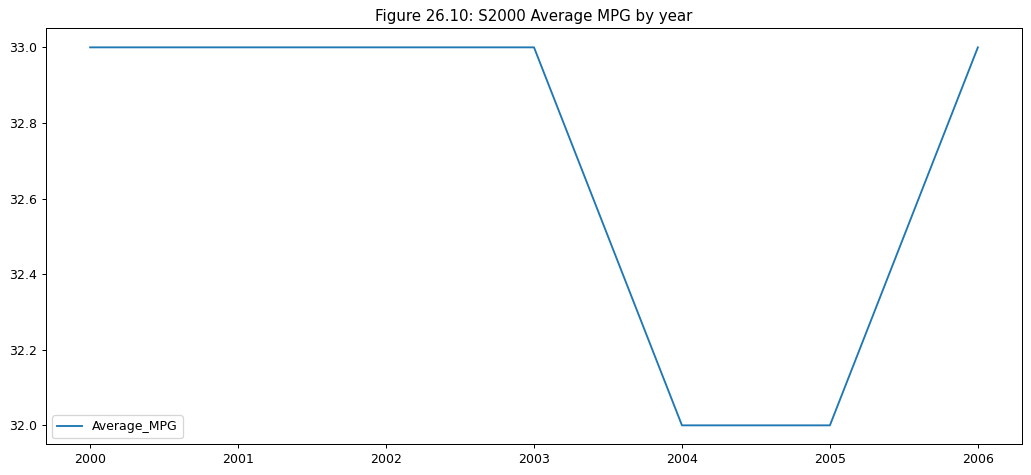

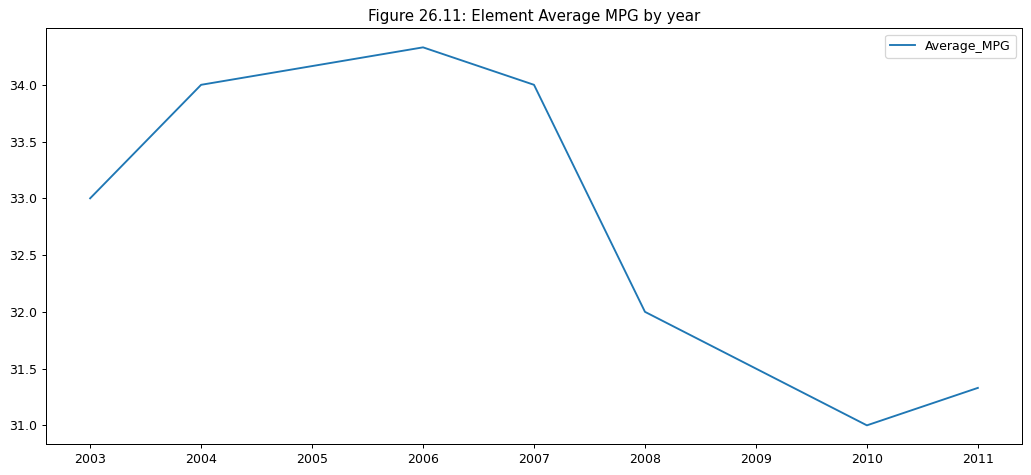

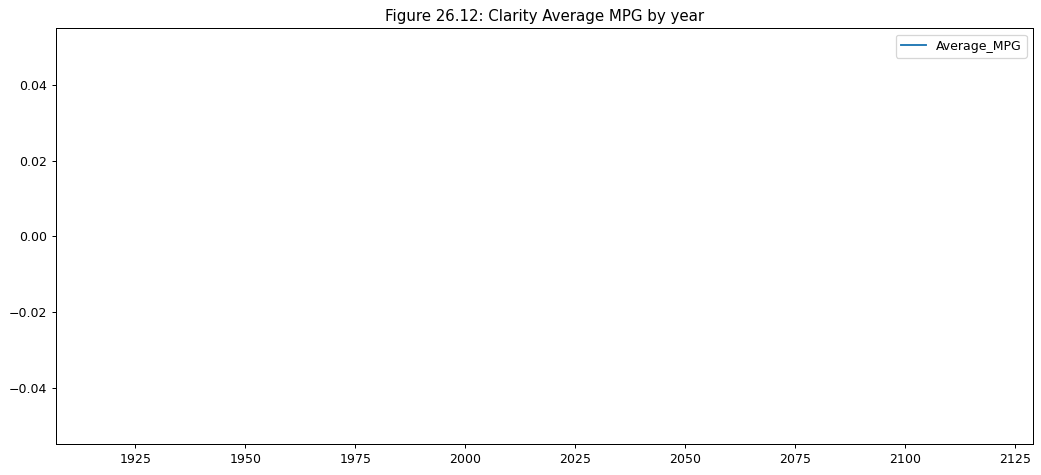

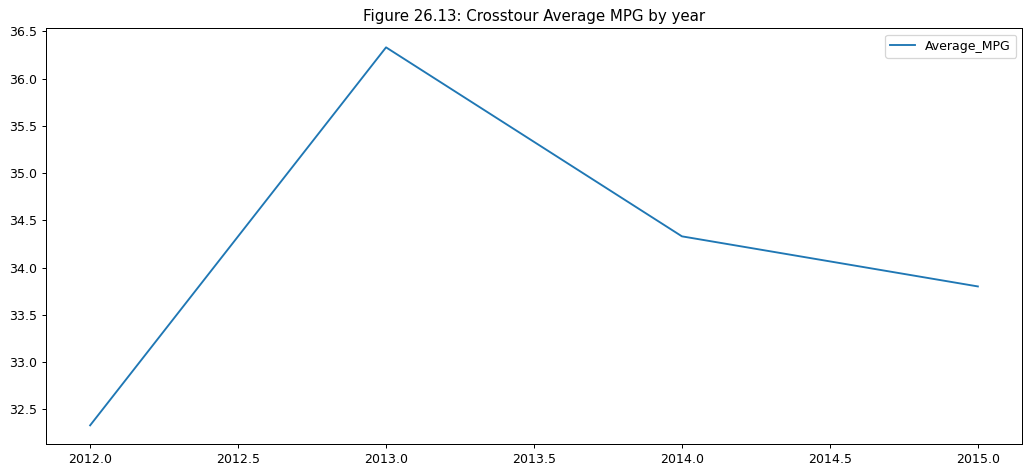

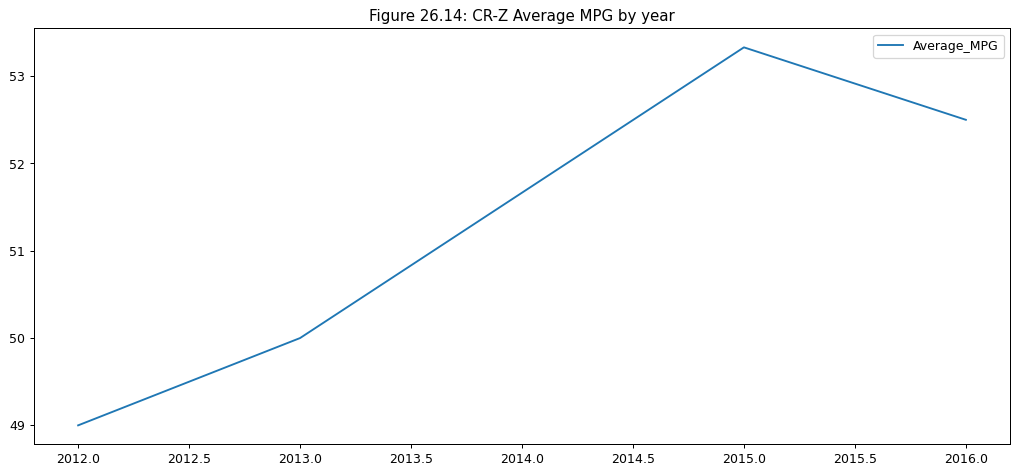

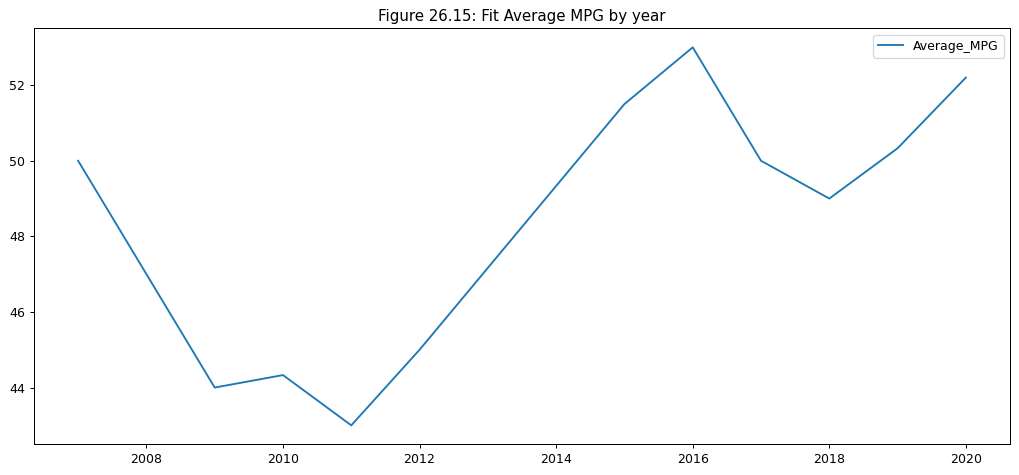

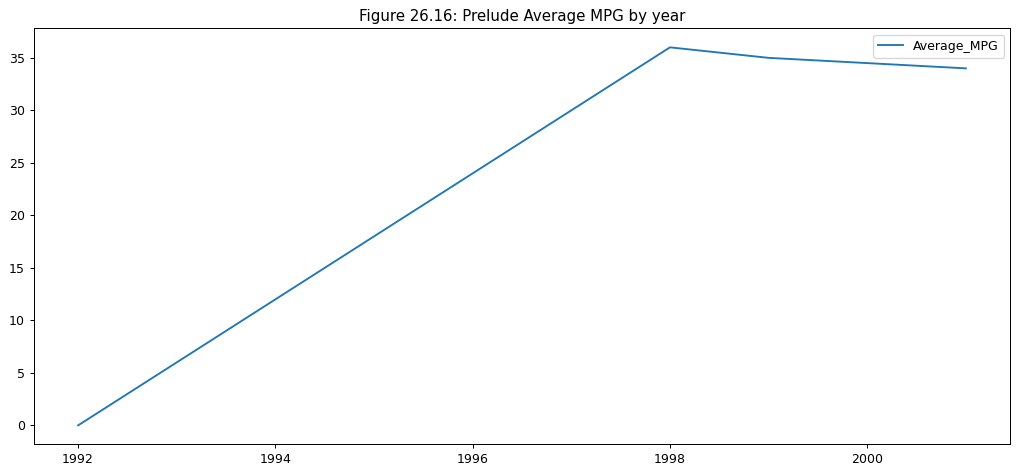

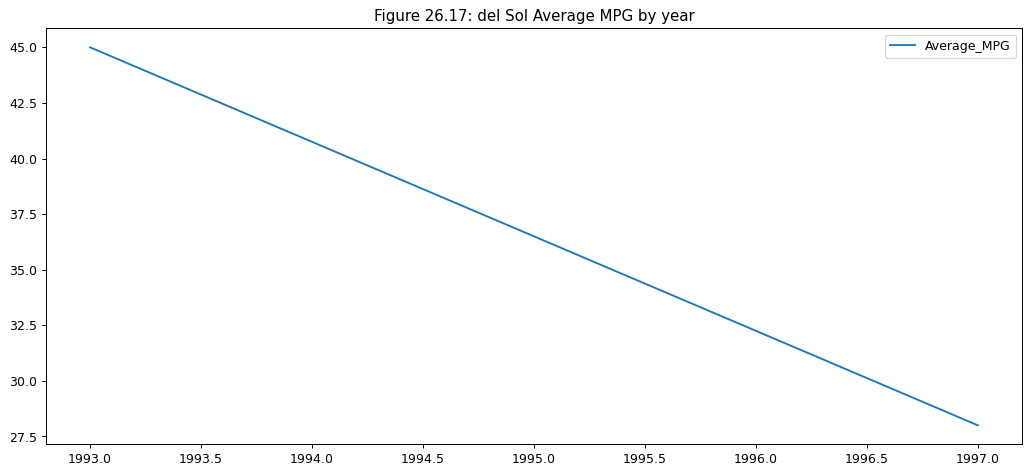

In [52]:
model_data = honda_data.dropna(subset='Average_MPG')
model_data.Model_Category
figure_sub_num = 1 
for cat in model_data.Model_Category.unique(): 
    plot_data = model_data[model_data.Model_Category == cat].groupby(["Year"]).aggregate({
        'Average_MPG': lambda value: round(value.mean(), 2),
    })
    plot_data.plot(kind='line')
    plt.title(f"Figure {figure_num}.{figure_sub_num}: {cat} Average MPG by year")
    figure_sub_num += 1
    plt.xlabel("")
    plt.ylabel("")
figure_num += 1

In [53]:
##################################################
#
# Question 4. Which models have the best ratings? 
#
##################################################

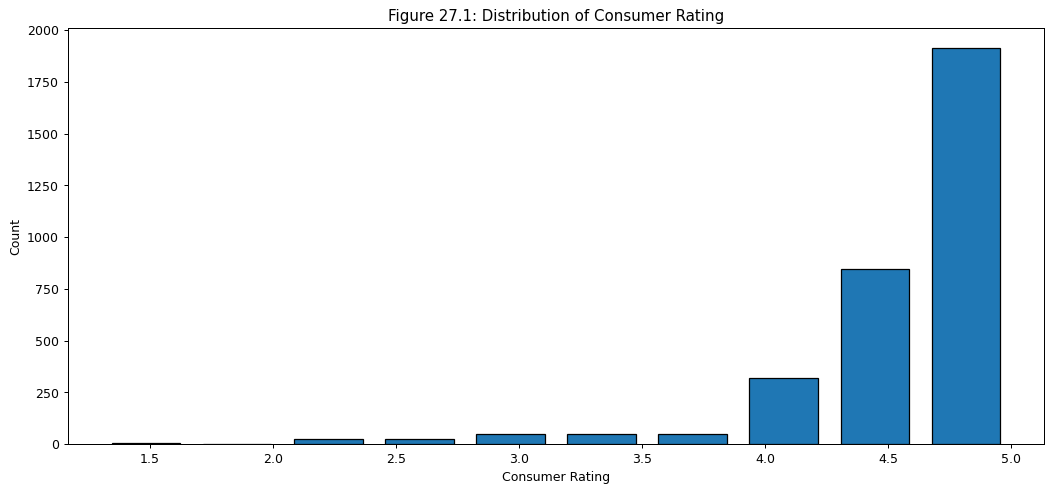

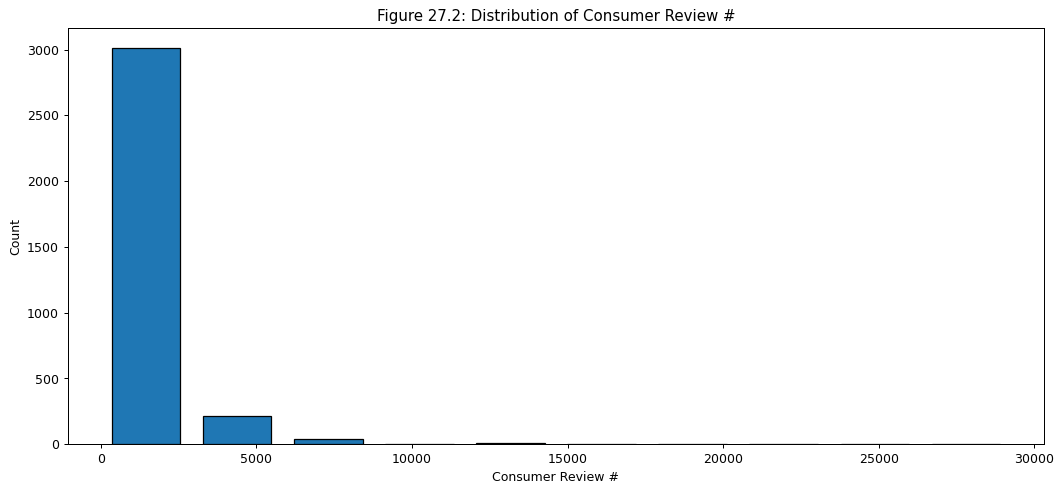

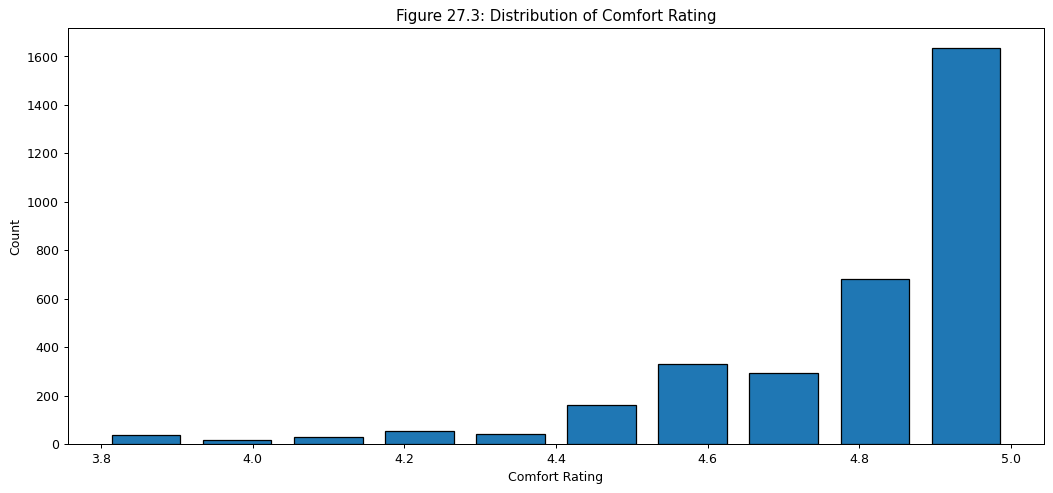

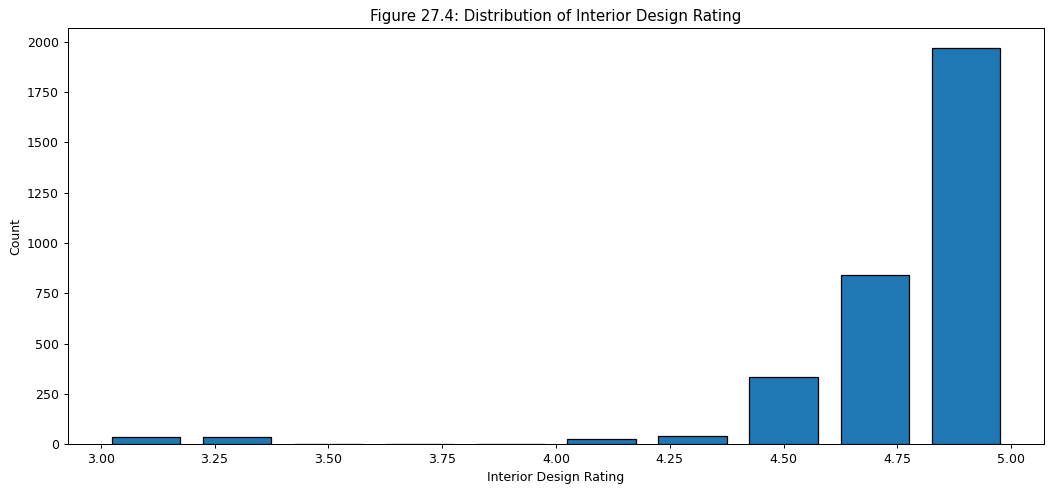

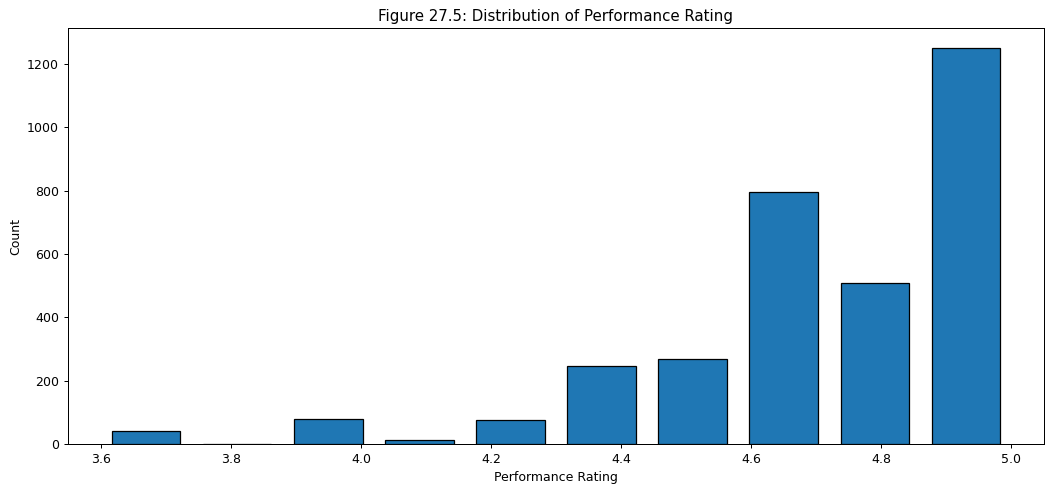

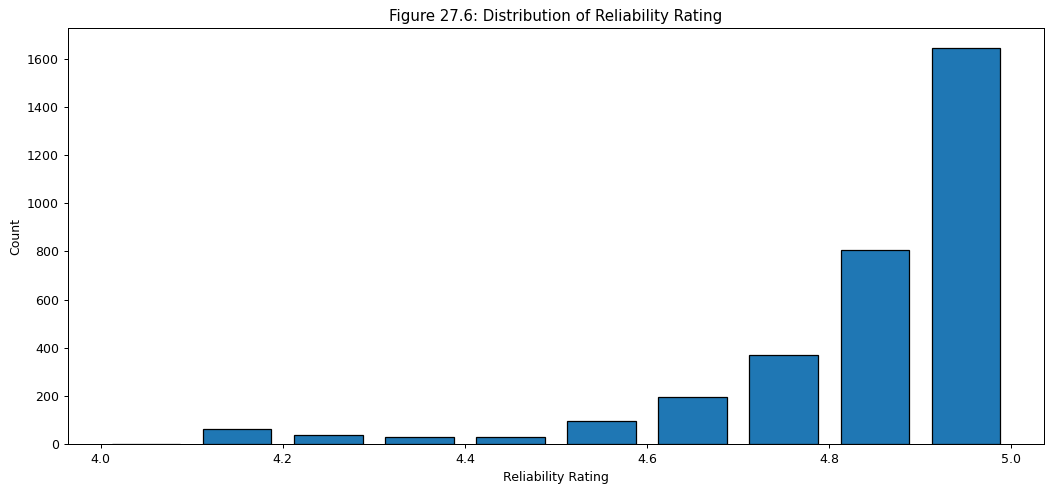

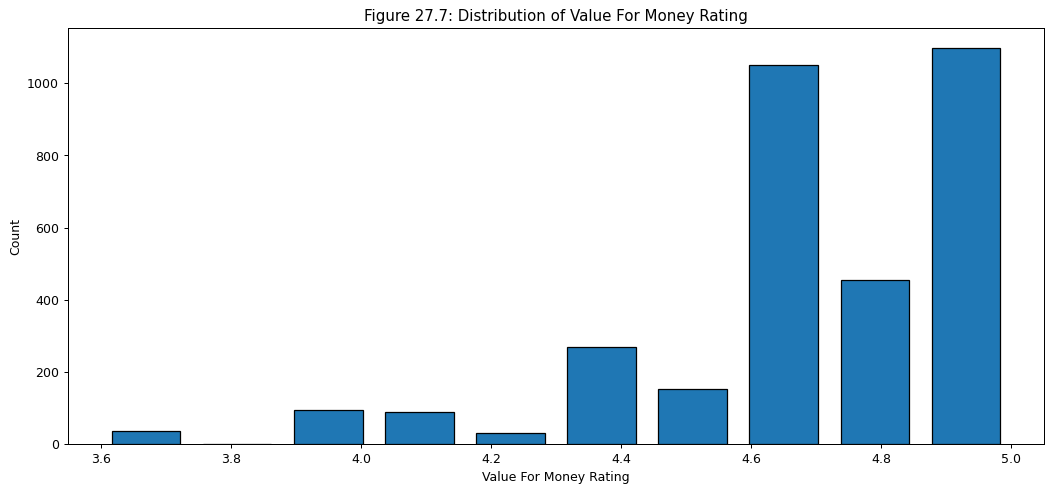

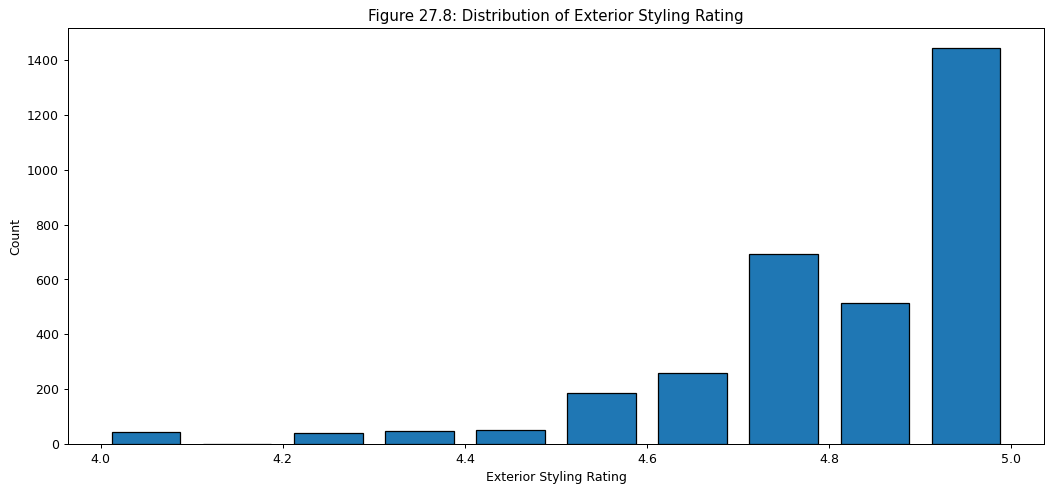

In [54]:
values = ["Consumer_Rating", 
          "Consumer_Review_#", 
          "Comfort_Rating", 
          "Interior_Design_Rating",
          "Performance_Rating",
          "Reliability_Rating", 
          "Value_For_Money_Rating",
          "Exterior_Styling_Rating"]
figure_sub_num = 1
for v in values:
    name_fix = v.replace("_", " ")
    plt.hist(honda_data[honda_data[v] != None][v], edgecolor='black', rwidth=0.75)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: Distribution of {name_fix}")
    figure_sub_num += 1
    plt.xlabel(name_fix)
    plt.ylabel("Count")
    plt.show() 
    
figure_num += 1

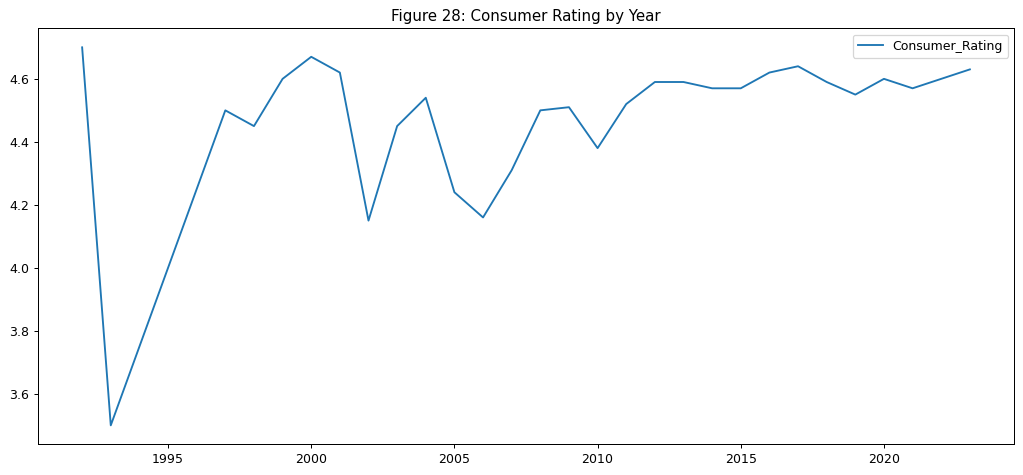

In [55]:
model_data = honda_data.groupby(["Year"]).aggregate({
    'Consumer_Rating': lambda value: round(value.mean(), 2),
})
model_data.plot(kind='line')
plt.title(f"Figure {figure_num}: Consumer Rating by Year")
figure_num += 1
plt.xlabel("")
plt.ylabel("")
plt.show()

In [56]:
# theres so few examples in those years that two bad reviews skewed the curve
c1 = honda_data.Consumer_Rating < 4
c2 = honda_data.Year < 2000
honda_data[c1 & c2]

Year   Make       Model Condition  Price  Consumer_Rating   
4677  1993  Honda  del Sol Si      Used  15500              3.5  \

      Consumer_Review_# Exterior_Color Interior_Color         Drivetrain  ...   
4677                186     Blue Pearl              –  Front-wheel Drive  ...  \

     Average_MPG Exterior_Color_Category Transmission_Category Cylinder_Size   
4677          45                    Blue       05 Speed Manual           1.6  \

     Cylinder_Count Cylinder_Valves  Cams  Injection_Type  Hybrid  Turbo  
4677              4              16   1.0            MPFI       0      0  

[1 rows x 36 columns]

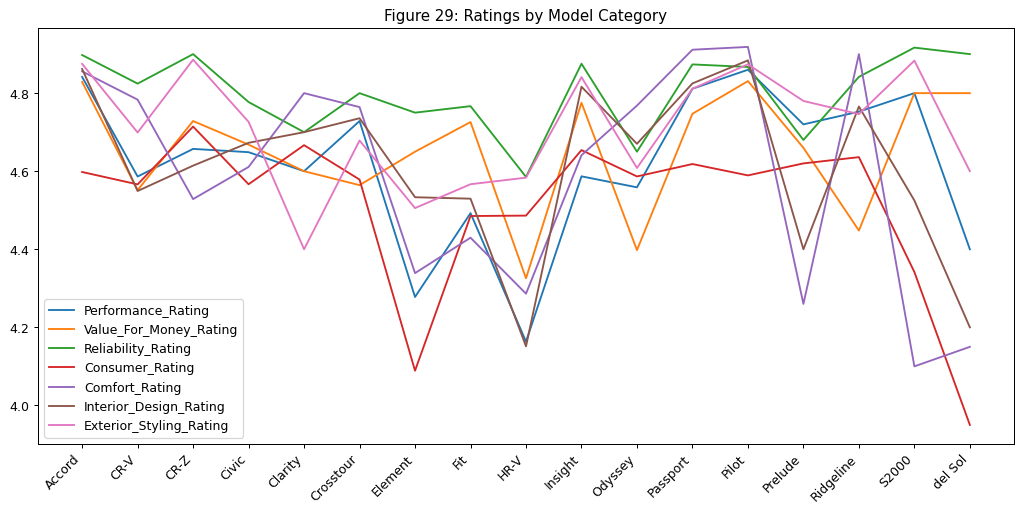

In [57]:
model_data = honda_data.groupby(["Model_Category"]).aggregate({
    'Performance_Rating': lambda value: value.mean(),
    'Value_For_Money_Rating': lambda value: value.mean(),
    'Reliability_Rating': lambda value: value.mean(),
    'Consumer_Rating': lambda value: value.mean(),
    'Comfort_Rating': lambda value: value.mean(),
    'Interior_Design_Rating': lambda value: value.mean(),
    'Exterior_Styling_Rating': lambda value: value.mean()
})
model_data.plot(kind='line')
plt.xticks(range(len(model_data.index)), model_data.index, rotation=45, ha="right")
plt.title(f"Figure {figure_num}: Ratings by Model Category")
figure_num += 1
plt.xlabel("")
plt.ylabel("")
plt.show()

In [58]:
#############################################################################################
#
# Question 5. What are the best deals for different budgets ($10,000, $20,000, ~ $60,000)?
#
#############################################################################################

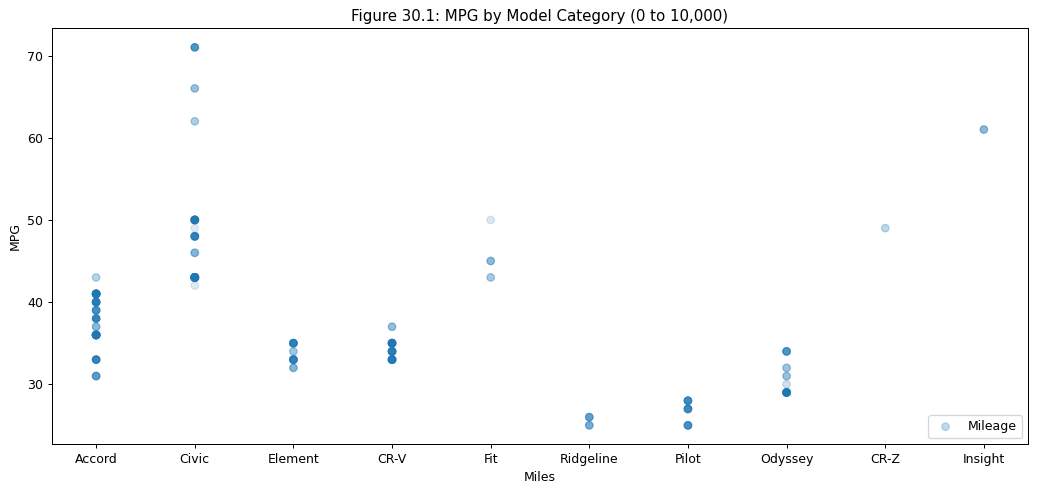

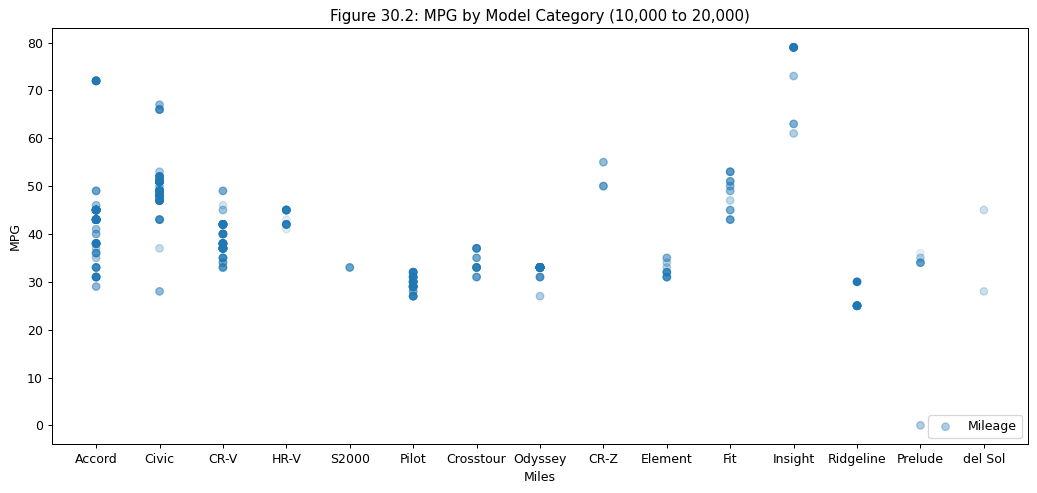

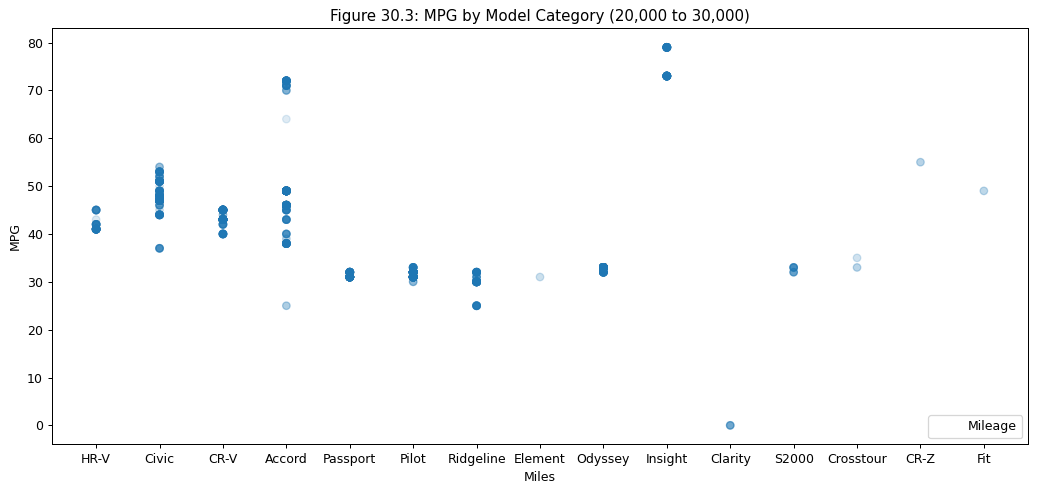

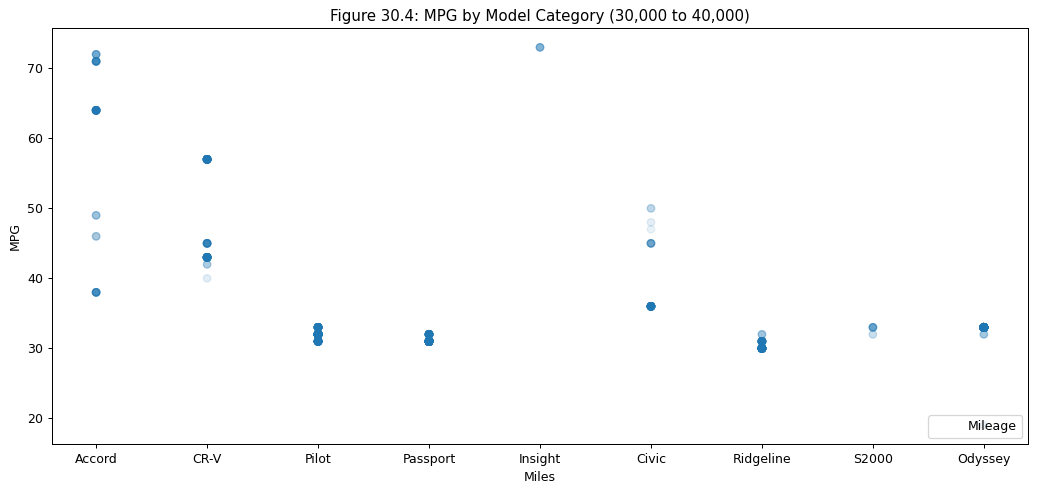

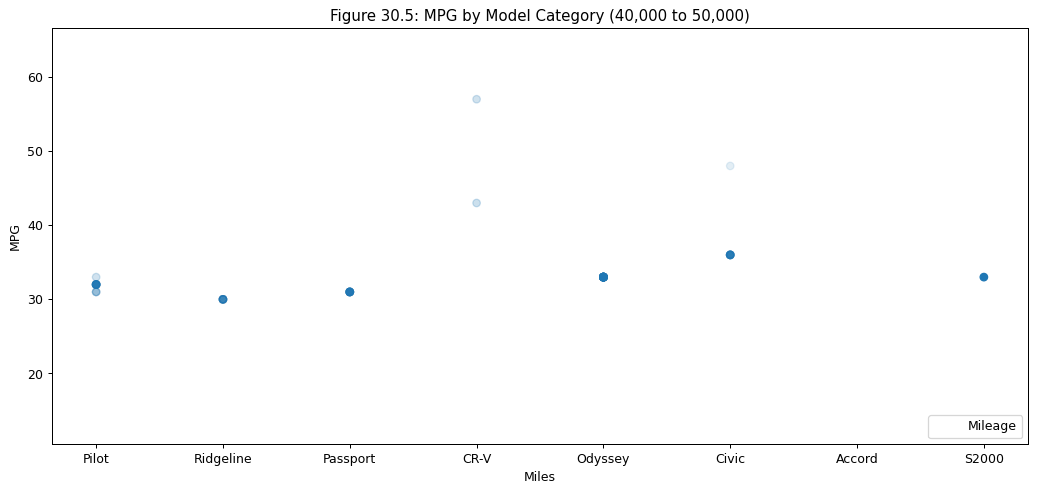

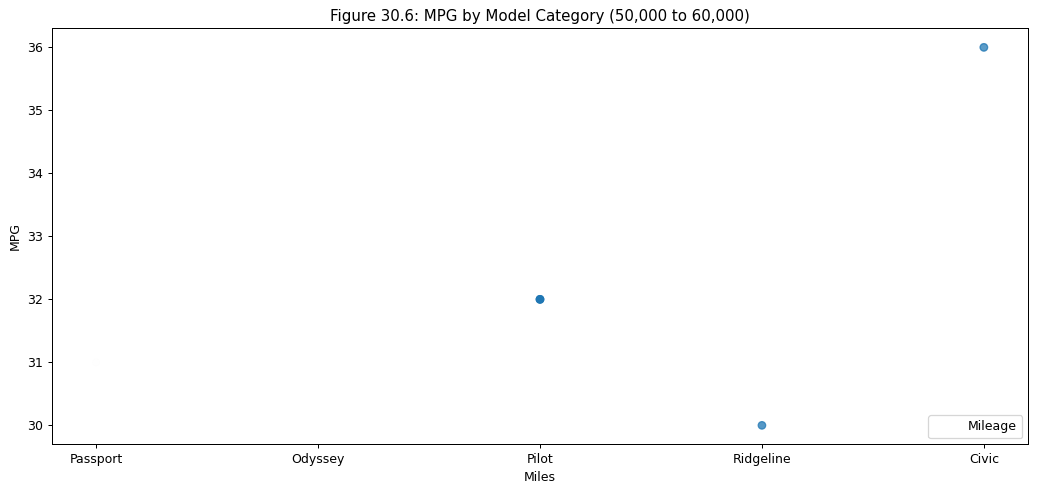

In [59]:
import math
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

cat_data = honda_data[(~pd.isna(honda_data.Model_Category)) & (~pd.isna(honda_data.Price)) & (~pd.isna(honda_data.Mileage)) & (~pd.isna(honda_data.Average_MPG))]
start = 0
ranges = [1,2,3,4,5,6]
figure_sub_num = 1
for r in ranges:
    end = r*10000
    plot_data = cat_data[(cat_data.Price > start) & (cat_data.Price <= end)]
    miles = normalize(plot_data.Mileage.astype("float32"))
    scatter_plot = plt.scatter(plot_data.Model_Category, plot_data.Average_MPG, alpha=miles)
    plt.title(f"Figure {figure_num}.{figure_sub_num}: MPG by Model Category ({start:,} to {end:,})")
    figure_sub_num += 1
    plt.xlabel("Miles")
    plt.ylabel("MPG")
    plt.legend(["Mileage"], loc='lower right')
    plt.show()
    start = end
figure_num += 1

In [60]:
########################################################
#
# Question 6. Which models were sold for the most years? 
#
########################################################

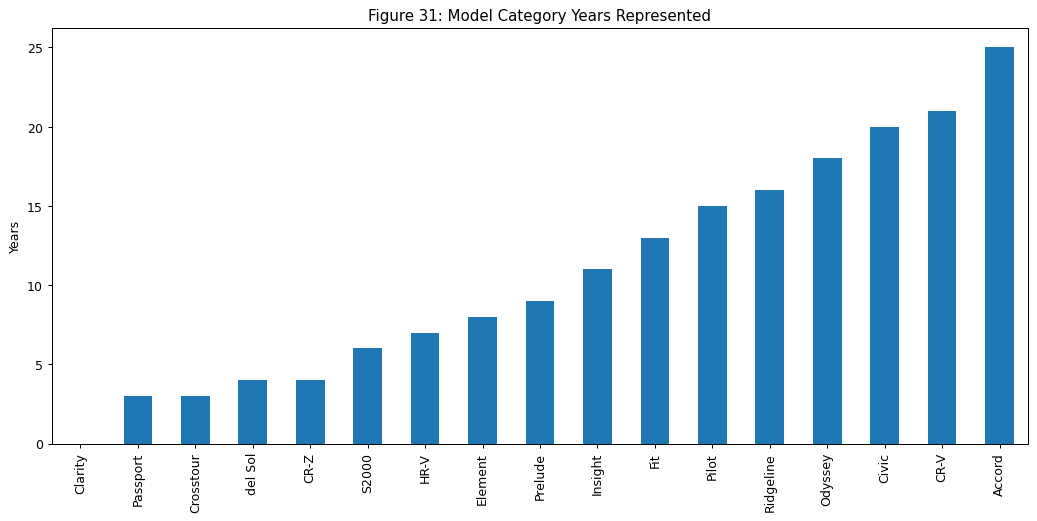

In [61]:
model_data = honda_data.groupby(["Model_Category"]).aggregate({
    'Year': lambda value: value.max() - value.min(),
})
model_data.sort_values('Year').plot(kind='bar')
plt.title(f"Figure {figure_num}: Model Category Years Represented")
figure_num += 1
plt.xlabel("")
plt.ylabel("Years")
plt.legend().remove()